In [1]:
import pandas as pd

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader

from nltk.tokenize import word_tokenize, wordpunct_tokenize
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [3]:
CUDA_LAUNCH_BLOCKING=1 

In [4]:
df=pd.read_csv('full_thesis_data.csv',header=None,sep=',')

In [5]:
df[0]

0           Disease
1            asthma
2            asthma
3            asthma
4            asthma
5            asthma
6            asthma
7            asthma
8            asthma
9            asthma
10           asthma
11           asthma
12           asthma
13           asthma
14           asthma
15           asthma
16           asthma
17           asthma
18           asthma
19           asthma
20           asthma
21           asthma
22           asthma
23           asthma
24           asthma
25           asthma
26           asthma
27           asthma
28           asthma
29           asthma
            ...    
11775    tracheitis
11776    tracheitis
11777    tracheitis
11778    tracheitis
11779    tracheitis
11780    tracheitis
11781    tracheitis
11782    tracheitis
11783    tracheitis
11784    tracheitis
11785    tracheitis
11786    tracheitis
11787    tracheitis
11788    tracheitis
11789    tracheitis
11790    tracheitis
11791    tracheitis
11792    tracheitis
11793    tracheitis


In [6]:
platform_count = {}
for i in df[1]:
    if i not in platform_count:
        platform_count[i] = 1
    else:
        platform_count[i] += 1

In [7]:
platform_count

{'Platform': 1, '120': 3717, '39': 500, 'chunyu': 2972, 'haodf': 4615}

In [8]:
len(df)

11805

In [9]:
result = {}
for i in range(len(df)):
    if df[1][i] == '120':
        if df[0][i] not in result:
            result[df[0][i]] = 1
        else:
            result[df[0][i]] += 1

print('120')            
print(result)


120
{'asthma': 795, 'flu': 798, 'Pneumoconiosis': 800, 'pneumonia': 527, 'tracheitis': 797}


In [10]:
result = {}
for i in range(len(df)):
    if df[1][i] == '39':
        if df[0][i] not in result:
            result[df[0][i]] = 1
        else:
            result[df[0][i]] += 1

print('39')            
print(result)

39
{'asthma': 100, 'flu': 100, 'Pneumoconiosis': 100, 'pneumonia': 100, 'tracheitis': 100}


In [11]:
result = {}
for i in range(len(df)):
    if df[1][i] == 'chunyu':
        if df[0][i] not in result:
            result[df[0][i]] = 1
        else:
            result[df[0][i]] += 1

print('chunyu')            
print(result)

chunyu
{'asthma': 600, 'flu': 589, 'Pneumoconiosis': 584, 'pneumonia': 599, 'tracheitis': 600}


In [12]:
result = {}
for i in range(len(df)):
    if df[1][i] == 'haodf':
        if df[0][i] not in result:
            result[df[0][i]] = 1
        else:
            result[df[0][i]] += 1

print('haodf')            
print(result)

haodf
{'asthma': 855, 'flu': 953, 'Pneumoconiosis': 944, 'pneumonia': 933, 'tracheitis': 930}


In [13]:
def dis_count(Platform, Disease, Df):
    result = {}
    for i in Df:
        if i[1] == Platform:
            if i[0] not in result:
                result[i[0]] = 1
            else:
                result[i[0]] += 1
    
    return result


In [21]:
import jieba
import jieba.analyse
with open('hit_stopwords.txt','r',encoding='utf-8') as stop:
    stop = stop.read()
    stop = stop.split('\n')
    

In [23]:
quant = len(df[2])
punc = ['。','，','？','！','（','）']
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r').readlines()]
    return stopwords

In [24]:
disease, platform, text, full_text, text_reduced, full_text_reduced = [], [], [], [], [], []
disease_list = ['气管炎','支气管炎','哮喘','肺炎','尘肺','流感']
jieba.load_userdict('medical terms.txt')
for i in range(1,quant):
    disease.append(df[0][i])
    platform.append(df[1][i])
    curr_text = df[2][i]
    curr_text = str(curr_text)
    curr_text = curr_text.replace('\t','')
    curr_text = curr_text.replace('\xa0','')
    curr_text_reduced = curr_text
    for k in disease_list:
        curr_text_reduced = curr_text_reduced.replace(k,'')
    
    
    full_text.append(curr_text)
    full_text_reduced.append(curr_text_reduced)
    curr_text = jieba.cut(curr_text,cut_all=False)
    curr_text_reduced = jieba.cut(curr_text_reduced, cut_all=False)
    to_add = []
    to_add_reduced = []
    for j in curr_text:
        if j not in stop:
            to_add.append(j)
    for j in curr_text_reduced:
        if j not in stop:
            to_add_reduced.append(j)
    
    text.append(to_add)
    text_reduced.append(to_add_reduced)

In [26]:
length = []
for i in full_text:
    length.append(len(i))
length.sort()
avg = 0
for i in length:
    avg += i
avg = avg/len(length)
leng = []
cou = []

for i in length:
    if i not in leng:
        leng.append(i)
        cou.append(length.count(i))

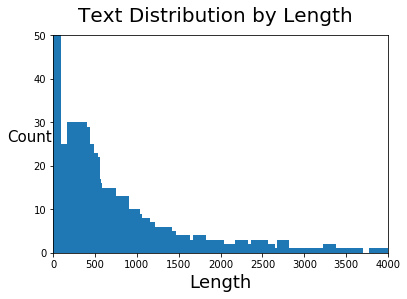

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()

fig.suptitle('Text Distribution by Length', fontsize=20)
plt.xlabel('Length', fontsize=18)
plt.ylabel('Count', fontsize=15,rotation=0)
plt.axis([0, 4000, 0, 50])
plt.bar(leng, cou, width=150)

plt.show()

In [28]:
len(full_text[2000])

826

In [29]:
full_text_reduced[2000]

'南方医科大学南方医院呼吸与危重症医学科感冒引起咳嗽肺部轻微炎症，治好后咳嗽一直不好，3个月前咳嗽胸腔里不舒服在哈尔滨附属第一医院确诊，医生开了信必可都宝，每天2次，每次2吸，用后症状消失，半月前突然加重，期间佩戴过二氧化氯除菌包，由于疫情期间去不了医院，当地县医院医生又给加了噻托溴铵，感觉效果不是很好噻托溴铵现在用了10天效果不明显，有时还是呼吸急促我的药是否对症，需要调整用药么未怀孕半年内哈尔滨医科大学附属第一医院呼吸科信必可都宝每次2吸，每天2次，噻托溴铵每天一次病历资料仅医生和患者本人可见不知道有没有过敏的，没做过检查（2020-03-23填写）无（2020-03-13填写）无（2020-03-13填写）病历资料仅医生和患者本人可见赵海金主任医师你好赵主任，信必可都宝一直用着，到现在3个月了中间没有停过，但是半月前就加重了，呼吸困难，肺功能一次是确诊时做的，另一次是信必可都宝用半个月时做的，您的意思是信必可都宝可以减量是么？我现在是每天四吸，早晚各吸两次赵海金主任医师赵主任你好，从上次咨询到现在一个月了，每天两次信必可都宝，每次两吸，期间加了孟鲁特斯钠，信必可都宝减为1吸，用了20天左右，效果不明显，而且浑身疼痛，就停了，现在的用药情况，每天两次信必可都宝，每次两吸，又加了阿斯美（用量每次两片，一日三次），这个药量到今天用了4天，还是呼吸急促，感觉气不够用，胸闷好像减轻一些，但是失眠，紧张，到晚上感觉特别精神，我的药量用调整么？阿斯美能长期服用么？赵海金主任医师感谢赵主任，第二天我失眠和呼吸困难的症状就好了，看来就是精神压力比较大引起的，谢谢赵主任耐心解答，我想问一下，信必可都保到现在已经用4个多月了，以我的情况，孟鲁特大约吃多久能停？（最近黑龙江疫情严重短时间还不能去医院做肺功能）赵海金主任医师孟鲁特上次吃了20天，浑身疼就没再吃，我感觉一直也没有鼻炎的症状像嗓子痒，打喷嚏什么的都没有赵海金主任医师科室：'

In [30]:
text[0]

['健康',
 '咨询',
 '描述',
 '去年',
 '诊断',
 '哮喘',
 '吃药',
 '至今',
 '未能',
 '治愈',
 '发作',
 '时',
 '呼吸困难',
 '喉咙',
 '哮鸣音',
 '严重',
 '时',
 '不能',
 '走动',
 '只能靠',
 '输',
 '缓解',
 '走时',
 '喘',
 '气来',
 '吃药',
 '无数',
 '未见好转',
 '感冒',
 '时',
 '病情',
 '更为严重',
 '可能',
 '过敏性',
 '鼻炎',
 '请问',
 '医生',
 '这病',
 '能否',
 '治愈',
 '家族',
 '无',
 '哮喘',
 '史',
 '第一次',
 '问题',
 '补充',
 '瑞金医院',
 '进行',
 '过敏性',
 '测试',
 '没有',
 '发现',
 '过敏源',
 '目前',
 '尚无',
 '根治',
 '哮喘',
 '特效药',
 '药物',
 '治疗',
 '有效',
 '控制',
 '哮喘',
 '发作',
 '应',
 '消除',
 '诱因',
 '哮喘',
 '诱因',
 '过敏原',
 '较为',
 '重要',
 '应',
 '医院',
 '检测',
 '明确',
 '后',
 '避开',
 '过敏原',
 '使',
 '部分',
 '哮喘',
 '得到',
 '控制',
 '去除',
 '诱因',
 '防治',
 '支气管哮喘',
 '首要',
 '措施',
 '保健',
 '关键',
 '哮喘',
 '诱因',
 '大致',
 '如下',
 '1',
 '吸入',
 '物',
 '包括',
 '花粉',
 '尘螨',
 '真菌',
 '面粉',
 '动物',
 '毛屑',
 '吸入性',
 '药物',
 '工业',
 '上',
 '有害',
 '气体',
 '粉尘',
 '硫酸',
 '氯',
 '氨',
 '电石气',
 '煤气',
 '沼气',
 '棉尘',
 '2',
 '呼吸道',
 '感染',
 '病毒',
 '细菌',
 '尤其',
 '呼吸道',
 '病毒',
 '感染',
 '逐渐',
 '形成',
 '激发',
 '哮喘',
 '情况',
 '极为',
 '常见',
 '3',
 '哮喘',
 '患者',
 '尤其',
 '过敏',


In [31]:
text_reduced[0]

['健康',
 '咨询',
 '描述',
 '去年',
 '诊断',
 '吃药',
 '至今',
 '未能',
 '治愈',
 '发作',
 '时',
 '呼吸困难',
 '喉咙',
 '哮鸣音',
 '严重',
 '时',
 '不能',
 '走动',
 '只能靠',
 '输',
 '缓解',
 '走时',
 '喘',
 '气来',
 '吃药',
 '无数',
 '未见好转',
 '感冒',
 '时',
 '病情',
 '更为严重',
 '可能',
 '过敏性',
 '鼻炎',
 '请问',
 '医生',
 '这病',
 '能否',
 '治愈',
 '家族',
 '无史',
 '第一次',
 '问题',
 '补充',
 '瑞金医院',
 '进行',
 '过敏性',
 '测试',
 '没有',
 '发现',
 '过敏源',
 '目前',
 '尚无',
 '根治',
 '特效药',
 '药物',
 '治疗',
 '有效',
 '控制',
 '发作',
 '应',
 '消除',
 '诱因',
 '诱因',
 '过敏原',
 '较为',
 '重要',
 '应',
 '医院',
 '检测',
 '明确',
 '后',
 '避开',
 '过敏原',
 '使',
 '部分',
 '得到',
 '控制',
 '去除',
 '诱因',
 '防治',
 '支气管',
 '首要',
 '措施',
 '保健',
 '关键',
 '诱因',
 '大致',
 '如下',
 '1',
 '吸入',
 '物',
 '包括',
 '花粉',
 '尘螨',
 '真菌',
 '面粉',
 '动物',
 '毛屑',
 '吸入性',
 '药物',
 '工业',
 '上',
 '有害',
 '气体',
 '粉尘',
 '硫酸',
 '氯',
 '氨',
 '电石气',
 '煤气',
 '沼气',
 '棉尘',
 '2',
 '呼吸道',
 '感染',
 '病毒',
 '细菌',
 '尤其',
 '呼吸道',
 '病毒',
 '感染',
 '逐渐',
 '形成',
 '激发',
 '情况',
 '极为',
 '常见',
 '3',
 '患者',
 '尤其',
 '过敏',
 '素质',
 '儿童',
 '气候变化',
 '导致',
 '支气管',
 '高',
 '反应',
 '状态',
 '4',
 '精神因素

In [32]:
ini = 0
for i in text:
    if len(i) <= 500:
         ini += 1
print(ini/len(text))

0.9451880718400543


In [33]:
ini = 0
for i in text_reduced:
    if len(i) <= 500:
         ini += 1
print(ini/len(text))

0.9478143002372077


In [41]:
import jieba.analyse
tfidf_full = []
for i in full_text:
    tfidf_full.append(jieba.analyse.extract_tags(i, topK=50, withWeight=True, allowPOS=()))

In [42]:
tfidf_full[0][0][0]

'哮喘'

In [43]:
tfidf_full_words = []
for i in tfidf_full:
    curr_line = []
    for j in i:
        curr_line.append(j[0])
    tfidf_full_words.append(curr_line)

In [45]:
tfidf_reduced = []
for i in full_text_reduced:
    tfidf_reduced.append(jieba.analyse.extract_tags(i, topK=50, withWeight=True, allowPOS=()))
tfidf_reduced_words = []
for i in tfidf_reduced:
    curr_line = []
    for j in i:
        curr_line.append(j[0])
    tfidf_reduced_words.append(curr_line)

In [47]:
word_count = {}
for i in range(1,quant-1):
    curr_text = text[i]
    for j in curr_text:
        if j not in word_count:
            word_count[j] = 1
        else:
            word_count[j] += 1

In [48]:
word_count_reduced = {}
for i in range(1,quant-1):
    curr_text = text_reduced[i]
    for j in curr_text:
        if j not in word_count_reduced:
            word_count_reduced[j] = 1
        else:
            word_count_reduced[j] += 1

In [51]:
def analyze_wc(word_count,threshold):
    av = 0
    for i in word_count:
        av += word_count[i]
    av = av/len(word_count)
    
    above = 0
    below = 0
    for i in word_count:
        if word_count[i] >= threshold:
            above += 1
        else:
            below += 1
        
    above_count = above/len(word_count)*100
    
    print('The average word count is:' + str(av))
    print(str(above_count) + '% of the words appear no less than ' + str(threshold) +' times.')

In [52]:
analyze_wc(word_count,2)

The average word count is:47.31714905062021
60.27056320500983% of the words appear no less than 2 times.


In [53]:
analyze_wc(word_count_reduced,2)

The average word count is:46.029770066972716
60.138317534132234% of the words appear no less than 2 times.


In [54]:
from gensim.models import Word2Vec

In [55]:
av_len = 0
below = 0
for i in range(len(text)):
    av_len += len(text[i])
av_len = av_len/len(text)
for i in range(len(text)):
    if len(text[i]) <= 500:
        below += 1
print(below/len(text))

0.9451880718400543


In [56]:
av_len

199.756099627245

In [57]:

abbre_text = []
curr_full = []
for i in text:
    curr_line = []
    if len(i) > 500:
        curr_line = i[:500]
    else:
        curr_line = i
        while len(curr_line) < 500:
            curr_line.append('PAD')
    curr_full.append(curr_line)

In [58]:

curr_full_reduced = []
for i in text_reduced:
    curr_line = []
    if len(i) > 500:
        curr_line = i[:500]
    else:
        curr_line = i
        while len(curr_line) < 500:
            curr_line.append('PAD')
    curr_full_reduced.append(curr_line)

In [61]:
curr_full_tfidf = []
for i in tfidf_full_words:
    curr_line = i
    if len(i) < 50:
        while len(curr_line) < 50:
            curr_line.append('PAD')
    curr_full_tfidf.append(curr_line)

In [63]:
curr_reduced_tfidf = []
for i in tfidf_reduced_words:
    curr_line = i
    if len(i) < 50:
        while len(curr_line) < 50:
            curr_line.append('PAD')
    curr_reduced_tfidf.append(curr_line)

In [70]:
emb = {'PAD':0}
ini = 1
for i in curr_full:
    for j in i:
        if j not in emb:
            emb[j] = ini
            ini += 1

In [71]:
emb_reduced = {'PAD':0}
ini = 1
for i in curr_full_reduced:
    for j in i:
        if j not in emb_reduced:
            emb_reduced[j] = ini
            ini += 1

In [64]:
emb_tfidf = {'PAD':0}
ini = 1
for i in curr_full_tfidf:
    for j in i:
        if j not in emb_tfidf:
            emb_tfidf[j] = ini
            ini += 1

In [65]:
emb_reduced_tfidf = {'PAD':0}
ini = 1
for i in curr_reduced_tfidf:
    for j in i:
        if j not in emb_reduced_tfidf:
            emb_reduced_tfidf[j] = ini
            ini += 1

In [66]:
model_w2v = Word2Vec(curr_full, min_count=1,size=500)
model_w2v_reduced = Word2Vec(curr_full_reduced, min_count=1,size=500)

In [104]:
model_w2v_tfidf = Word2Vec(curr_full_tfidf, min_count=1,size=500)
model_w2v_tfidf_reduced = Word2Vec(curr_reduced_tfidf, min_count=1,size=500)

In [72]:
vec_full = []
for i in curr_full:
    curr_vec_line = []
    for j in i:
        curr_vec_line.append(emb[j])
    vec_full.append(curr_vec_line)

In [73]:
vec_full_reduced = []
for i in curr_full_reduced:
    curr_vec_line = []
    for j in i:
        curr_vec_line.append(emb_reduced[j])
    vec_full_reduced.append(curr_vec_line)

In [74]:
vec_full_tfidf = []
for i in curr_full_tfidf:
    curr_vec_line = []
    for j in i:
        curr_vec_line.append(emb_tfidf[j])
    vec_full_tfidf.append(curr_vec_line)

In [75]:
vec_reduced_tfidf = []
for i in curr_reduced_tfidf:
    curr_vec_line = []
    for j in i:
        curr_vec_line.append(emb_reduced_tfidf[j])
    vec_reduced_tfidf.append(curr_vec_line)

In [76]:
len(vec_full[0])

500

In [77]:
import numpy as np

In [78]:
arr_full = np.asarray(vec_full)
arr_full_reduced = np.asarray(vec_full_reduced)

In [79]:
arr_full_tfidf = np.asarray(vec_full_tfidf)
arr_reduced_tfidf = np.asarray(vec_reduced_tfidf)

In [80]:
arr_full[0]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  12,  17,  18,  19,  20,  21,  22,  23,  24,   7,
        25,  26,  27,  12,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        10,  37,  38,   6,  39,  40,  41,  42,  43,  44,  31,  45,  46,
        47,  48,  49,  50,  51,   6,  52,  53,  54,  55,  56,   6,  11,
        57,  58,  59,   6,  59,  60,  61,  62,  57,  63,  64,  65,  66,
        67,  60,  68,  69,   6,  70,  56,  71,  59,  72,  73,  74,  75,
        76,  77,   6,  59,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  53,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 104, 106, 105,
       109, 110, 111,   6, 112, 113, 114, 115,   6, 116, 108, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128,   6, 129, 130,
       131,  92, 132, 133, 134, 135, 136, 137, 138, 139,  12, 140, 141,
       142,  68, 143, 144, 145,  11, 146, 133,   6,  11, 147, 14

In [81]:
dic_dis = {}
ini = 0
uni_dis = []
for i in disease:
    if i not in uni_dis:
        uni_dis.append(i)

for i in range(len(uni_dis)):
    dic_dis[uni_dis[i]] = i

In [82]:
dic_dis

{'asthma': 0, 'flu': 1, 'Pneumoconiosis': 2, 'pneumonia': 3, 'tracheitis': 4}

In [83]:
code_dis = [dic_dis[i] for i in disease]

In [84]:
arr_dis = np.asarray(code_dis)

In [85]:
len(emb)

47197

In [86]:
def loader(x,y):
    x = torch.Tensor(x).long()
    y = torch.Tensor(y).long()
    
    return x,y

In [117]:
x_train, x_validation, y_train, y_validation = train_test_split(arr_full, arr_dis, test_size=0.1)
x_train_reduced, x_validation_reduced, y_train_reduced, y_validation_reduced = train_test_split(arr_full_reduced, arr_dis, test_size=0.1)

In [118]:
x_train_tfidf, x_validation_tfidf, y_train_tfidf, y_validation_tfidf = train_test_split(arr_full_tfidf, arr_dis, test_size=0.1)
x_train_reduced_tfidf, x_validation_reduced_tfidf, y_train_reduced_tfidf, y_validation_reduced_tfidf = train_test_split(arr_reduced_tfidf, arr_dis, test_size=0.1)

In [119]:
main_train_dataset = loader(x_train,y_train)
main_train_dataset_reduced = loader(x_train_reduced,y_train_reduced)

In [120]:
main_train_dataset_tfidf = loader(x_train_tfidf,y_train_tfidf)
main_train_dataset_reduced_tfidf = loader(x_train_reduced_tfidf,y_train_reduced_tfidf)

In [121]:
len(main_train_dataset)

2

In [122]:
main_train_dataset = DataLoader(main_train_dataset,batch_size=64)
main_train_dataset_reduced = DataLoader(main_train_dataset_reduced,batch_size=64)

In [123]:
main_train_dataset_tfidf = DataLoader(main_train_dataset_tfidf,batch_size=64)
main_train_dataset_reduced_tfidf = DataLoader(main_train_dataset_reduced_tfidf,batch_size=64)

In [124]:
x_train = DataLoader(x_train, batch_size=64)
x_train_reduced = DataLoader(x_train_reduced, batch_size=64)
y_train = DataLoader(y_train, batch_size=64)
y_train_reduced = DataLoader(y_train_reduced, batch_size=64)

In [125]:
x_train_tfidf = DataLoader(x_train_tfidf, batch_size=64)
x_train_reduced_tfidf = DataLoader(x_train_reduced_tfidf, batch_size=64)
y_train_tfidf = DataLoader(y_train_tfidf, batch_size=64)
y_train_reduced_tfidf = DataLoader(y_train_reduced_tfidf, batch_size=64)

In [126]:
x_validation = DataLoader(x_validation, batch_size=64)
y_validation = DataLoader(y_validation, batch_size=64)
x_validation_reduced = DataLoader(x_validation_reduced, batch_size=64)
y_validation_reduced = DataLoader(y_validation_reduced, batch_size=64)

In [127]:
x_validation_tfidf = DataLoader(x_validation_tfidf, batch_size=64)
y_validation_tfidf = DataLoader(y_validation_tfidf, batch_size=64)
x_validation_reduced_tfidf = DataLoader(x_validation_reduced_tfidf, batch_size=64)
y_validation_reduced_tfidf = DataLoader(y_validation_reduced_tfidf, batch_size=64)

In [98]:
arr_full.shape

(11804, 500)

In [99]:
arr_full_reduced.shape

(11804, 500)

In [100]:
model_w2v_reduced['咳嗽']

C:\NonSystem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.95449764, -0.2212594 ,  0.4837046 , -1.8031902 , -0.66192096,
        0.80904883, -0.6585315 , -0.60293573, -2.11299   ,  1.0887882 ,
        0.6968631 , -0.941594  , -0.14150798,  1.0827    ,  0.3551969 ,
        0.518747  , -1.0639807 , -0.58838046, -1.143368  , -1.978542  ,
        0.42392996,  1.343212  ,  2.3671122 ,  0.86695594, -0.89474833,
       -1.1938299 ,  0.44029564, -0.7907778 , -0.15986925,  0.7439203 ,
        0.25271085,  0.46693176, -0.6793724 ,  0.86356986,  1.406071  ,
       -1.2409871 ,  1.4971974 , -0.10475383,  0.48140973,  0.08093306,
       -0.98780733, -1.1202837 , -1.2086178 ,  0.3699571 , -2.4280589 ,
       -1.6345552 ,  0.7704219 ,  0.4505322 ,  0.06792415, -0.4185474 ,
       -1.1866846 ,  0.58244497,  0.7866383 ,  1.0226884 , -1.617909  ,
        0.99574816, -0.08432002, -0.7870365 , -0.18233444, -0.3520049 ,
       -1.7978337 ,  0.55093265, -0.35793662, -0.28844523, -1.1437979 ,
        2.0399435 , -0.05870542,  1.0672929 , -1.2740793 , -0.17

In [106]:
vectors = []
vectors.append(np.zeros((1, 500)))
for i in emb:
    
    vectors.append(model_w2v[i].reshape(1,500))

C:\NonSystem\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [107]:
vectors_reduced = []
vectors_reduced.append(np.zeros((1, 500)))
for i in emb_reduced:
    
    vectors_reduced.append(model_w2v_reduced[i].reshape(1,500))

C:\NonSystem\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [108]:
vectors_tfidf = []
vectors_tfidf.append(np.zeros((1, 500)))
for i in emb_tfidf:  
    vectors_tfidf.append(model_w2v_tfidf[i].reshape(1,500))

C:\NonSystem\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [109]:
vectors_reduced_tfidf = []
vectors_reduced_tfidf.append(np.zeros((1, 500)))
for i in emb_reduced_tfidf:  
    vectors_reduced_tfidf.append(model_w2v_tfidf_reduced[i].reshape(1,500))

C:\NonSystem\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [110]:
vectors = np.concatenate(vectors)
vectors_reduced = np.concatenate(vectors_reduced)

In [111]:
vectors_tfidf = np.concatenate(vectors_tfidf)
vectors_reduced_tfidf = np.concatenate(vectors_reduced_tfidf)

In [232]:
class DeepAverageNetwork(torch.nn.Module):
    
    def __init__(self, embedding_matrix, n_classes):
        
        super().__init__()
        
        self.embedding_layer = torch.nn.Embedding.from_pretrained(torch.Tensor(embedding_matrix))
        
        self.layers = torch.nn.Sequential(torch.nn.Linear(500, 256),
                                          torch.nn.ReLU(), 
                                          torch.nn.Linear(256, 128),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(128, n_classes))
    def forward(self, x):
        
        sequence_lengths = (x > 0).sum(dim=1)
        sequence_lengths[sequence_lengths == 0.] = 1
        
        x = self.embedding_layer(x)
        
        x = x.mean(dim=-2)
        
        lengths_scaling = sequence_lengths.float() / x.size(1)
        lengths_scaling = lengths_scaling.unsqueeze(1).repeat((1, x.size(-1)))
        x /= lengths_scaling.to(x.device)
        
        x = self.layers(x)
        
        return x

In [233]:
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

batch_size = 64
main_num_classes = 5


embedding_dim  = 500

def attention(encode):

        attention_scores = torch.bmm(encode, encode.transpose(1, 2))
        attention_distribution = torch.softmax(attention_scores, 2)
        attention_vectors = torch.bmm(attention_distribution, encode)

        decoder_with_attention = torch.cat([encode, attention_vectors],dim=-1)
        
        return decoder_with_attention

class Model(torch.nn.Module):
    def __init__(self,embedding_dim, n_hidden,vocab_size):
        super(Model, self).__init__()
        
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, n_hidden, bidirectional=True)
        self.dropout = nn.Dropout(0.2)
        self.cnn = torch.nn.Conv1d(in_channels=500, out_channels=256, kernel_size=2)
        self.linear = torch.nn.Linear(in_features=256, out_features=5)
        self.pool = nn.AdaptiveAvgPool1d(1)
    
    def forward(self, X):
        
        X = self.embedding(X)
        
        X = self.dropout(X)
        
        X = X.transpose(0,1)
        
        X, states = self.lstm(X)
        
        X = X.transpose(0,1)
        
        X = self.dropout(X)
        
        X = attention(X)
        
        X = self.cnn(X)
        
        X = torch.relu(X)
        X = self.pool(X)
        X = X.squeeze()
        
        X = self.linear(X)
        
        
        
        return X



In [242]:
class Model_tfidf(torch.nn.Module):
    def __init__(self,embedding_dim, n_hidden,vocab_size):
        super(Model, self).__init__()
        
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, n_hidden, bidirectional=True)
        self.dropout = nn.Dropout(0.2)
        self.cnn = torch.nn.Conv1d(in_channels=500, out_channels=256, kernel_size=2)
        self.linear = torch.nn.Linear(in_features=256, out_features=5)
        self.pool = nn.AdaptiveAvgPool1d(1)
    
    def forward(self, X):
        
        X = self.embedding(X)
        
        X = self.dropout(X)
        
        X = X.transpose(0,1)
        
        X, states = self.lstm(X)
        
        X = X.transpose(0,1)
        
        X = self.dropout(X)
        
        X = attention(X)
        
        X = self.cnn(X)
        
        X = torch.relu(X)
        X = self.pool(X)
        X = X.squeeze()
        
        X = self.linear(X)
        
        
        
        return X

In [235]:
class WordData(Dataset):
    
    def __init__(self, x_data, y_data, word2index, sequence_length=500, pad_token='PAD', verbose=True):
        
        super().__init__()
        
        self.x_data = []
        self.y_data = y_data
        
        self.word2index = word2index
        self.sequence_length = sequence_length
        
        self.pad_token = pad_token
        self.pad_index = self.word2index[self.pad_token]
        
        self.load(x_data, verbose=verbose)
        
    @staticmethod
    def process_text(text):
        
        # Место для вашей предобработки
        
        curr_text = jieba.cut(text,cut_all=False)
        to_add = []
        for j in curr_text:
            if j not in stop:
                to_add.append(j)
        
        #words = [lem_dict[word] for word if word in lem_dict] #For lemmatization, which worsens the performance. So we don't use it here.
        
        return to_add
        
    def load(self, data, verbose=True):
        
        data_iterator = tqdm(data, desc='Loading data', disable=not verbose)
        
        for text in data_iterator:
            words = self.process_text(text)
            indexed_words = self.indexing(words)
            self.x_data.append(indexed_words)
    
    def indexing(self, tokenized_text):

        # здесь мы не используем токен UNK, потому что мы мы его специально не учили
        # становится непонятно какой же эмбеддинг присвоить неизвестному слову,
        # поэтому просто выбрасываем наши неизветсные слова
        
        ### CODE ###

        return [self.word2index[token] for token in tokenized_text if token in self.word2index ]
    
    def padding(self, sequence):
        
        # Ограничить длину self.sequence_length
        # если длина меньше максимально - западить
        
        ### CODE ###

        if len(sequence) > self.sequence_length:
            sequence = sequence[:self.sequence_length]
        elif len(sequence) < self.sequence_length:
            sequence = sequence + [self.pad_index] * (self.sequence_length - len(sequence))

        return sequence
    
    def __len__(self):
        
        return len(self.x_data)
    
    def __getitem__(self, idx):
        
        x = self.x_data[idx]
        x = self.padding(x)
        x = torch.Tensor(x).long()
        
        y = self.y_data[idx]
        
        return x, y

In [247]:
class WordData_tfidf(Dataset):
    
    def __init__(self, x_data, y_data, word2index, sequence_length=500, pad_token='PAD', verbose=True):
        
        super().__init__()
        
        self.x_data = []
        self.y_data = y_data
        
        self.word2index = word2index
        self.sequence_length = sequence_length
        
        self.pad_token = pad_token
        self.pad_index = self.word2index[self.pad_token]
        
        self.load(x_data, verbose=verbose)
        
    @staticmethod
    def process_text(text):
        
        # Место для вашей предобработки
        
        curr_text = jieba.analyse.extract_tags(text, topK=50, withWeight=True, allowPOS=())
        to_add = []
        for j in curr_text:   
            if j[0] not in stop:
                to_add.append(j[0])
        
        #words = [lem_dict[word] for word if word in lem_dict] #For lemmatization, which worsens the performance. So we don't use it here.
        
        return to_add
        
    def load(self, data, verbose=True):
        
        data_iterator = tqdm(data, desc='Loading data', disable=not verbose)
        
        for text in data_iterator:
            words = self.process_text(text)
            indexed_words = self.indexing(words)
            self.x_data.append(indexed_words)
    
    def indexing(self, tokenized_text):

        # здесь мы не используем токен UNK, потому что мы мы его специально не учили
        # становится непонятно какой же эмбеддинг присвоить неизвестному слову,
        # поэтому просто выбрасываем наши неизветсные слова
        
        ### CODE ###

        return [self.word2index[token] for token in tokenized_text if token in self.word2index ]
    
    def padding(self, sequence):
        
        # Ограничить длину self.sequence_length
        # если длина меньше максимально - западить
        
        ### CODE ###

        if len(sequence) > self.sequence_length:
            sequence = sequence[:self.sequence_length]
        elif len(sequence) < self.sequence_length:
            sequence = sequence + [self.pad_index] * (self.sequence_length - len(sequence))

        return sequence
    
    def __len__(self):
        
        return len(self.x_data)
    
    def __getitem__(self, idx):
        
        x = self.x_data[idx]
        x = self.padding(x)
        x = torch.Tensor(x).long()
        
        y = self.y_data[idx]
        
        return x, y

In [130]:
word2index = emb
x_train, x_validation, y_train, y_validation = train_test_split(full_text, code_dis, test_size=0.1)

train_dataset = WordData(x_train, y_train, word2index)
train_loader = DataLoader(train_dataset, batch_size=64)

validation_dataset = WordData(list(x_validation), list(y_validation), word2index)
validation_loader = DataLoader(validation_dataset, batch_size=64)


Loading data:  28%|█████████████████▌                                            | 3009/10623 [00:14<00:38, 195.28it/s]


Loading data:  57%|███████████████████████████████████▍                          | 6069/10623 [00:30<00:24, 189.43it/s]


Loading data:  85%|████████████████████████████████████████████████████▋         | 9038/10623 [00:45<00:07, 198.63it/s]


Loading data: 100%|█████████████████████████████████████████████████████████████| 10623/10623 [00:52<00:00, 240.82it/s]

Loading data: 100%|███████████████████████████████████████████████████████████████| 1181/1181 [00:06<00:00, 187.03it/s]

In [131]:
word2index_reduced = emb_reduced
x_train_reduced, x_validation_reduced, y_train_reduced, y_validation_reduced = train_test_split(full_text_reduced, code_dis, test_size=0.1)

train_dataset_reduced = WordData(x_train_reduced, y_train_reduced, word2index_reduced)
train_loader_reduced = DataLoader(train_dataset_reduced, batch_size=64)

validation_dataset_reduced = WordData(list(x_validation_reduced), list(y_validation_reduced), word2index_reduced)
validation_loader_reduced = DataLoader(validation_dataset_reduced, batch_size=64)


Loading data:  28%|█████████████████▌                                            | 3015/10623 [00:15<00:38, 199.04it/s]


Loading data:  58%|███████████████████████████████████▉                          | 6147/10623 [00:30<00:22, 203.42it/s]


Loading data:  87%|██████████████████████████████████████████████████████        | 9268/10623 [00:45<00:06, 204.64it/s]


Loading data: 100%|███████████████████████████████████████████████████████████████| 1181/1181 [00:05<00:00, 201.01it/s]

In [248]:
word2index_tfidf = emb_tfidf
x_train_tfidf, x_validation_tfidf, y_train_tfidf, y_validation_tfidf = train_test_split(full_text, code_dis, test_size=0.1)

train_dataset_tfidf = WordData_tfidf(x_train_tfidf, y_train_tfidf, word2index_tfidf)
train_loader_tfidf = DataLoader(train_dataset_tfidf, batch_size=64)

validation_dataset_tfidf = WordData_tfidf(list(x_validation_tfidf), list(y_validation_tfidf), word2index_tfidf)
validation_loader_tfidf = DataLoader(validation_dataset_tfidf, batch_size=64)
















Loading data:   0%|                                                                          | 0/10623 [00:00<?, ?it/s]














Loading data:   0%|                                                                  | 1/10623 [00:00<57:36,  3.07it/s]














Loading data:   0%|                                                                  | 4/10623 [00:00<42:49,  4.13it/s]














Loading data:   0%|                                                                 | 14/10623 [00:00<30:30,  5.80it/s]














Loading data:   0%|▏                                                                | 36/10623 [00:00<21:33,  8.19it/s]














Loading data:   1%|▎                                                                | 55/10623 [00:00<15:20, 11.48it/s]














Loading data:   1%|▍                                                                | 74/10623 [00:00<11:00, 15.97it/s]














Loading data:   1%|▌                           

Loading data:  35%|█████████████████████▊                                        | 3740/10623 [00:13<00:20, 330.42it/s]














Loading data:  36%|██████████████████████                                        | 3776/10623 [00:13<00:20, 338.75it/s]














Loading data:  36%|██████████████████████▏                                       | 3811/10623 [00:13<00:21, 318.66it/s]














Loading data:  36%|██████████████████████▍                                       | 3844/10623 [00:13<00:25, 270.48it/s]














Loading data:  37%|██████████████████████▋                                       | 3882/10623 [00:13<00:22, 293.33it/s]














Loading data:  37%|██████████████████████▊                                       | 3917/10623 [00:13<00:21, 308.28it/s]














Loading data:  37%|███████████████████████                                       | 3951/10623 [00:14<00:21, 317.15it/s]














Loading data:  38%|███████████████████████▎                   

Loading data:  72%|████████████████████████████████████████████▉                 | 7689/10623 [00:26<00:10, 269.97it/s]














Loading data:  73%|█████████████████████████████████████████████                 | 7721/10623 [00:26<00:10, 279.53it/s]














Loading data:  73%|█████████████████████████████████████████████▎                | 7756/10623 [00:26<00:09, 296.74it/s]














Loading data:  73%|█████████████████████████████████████████████▌                | 7796/10623 [00:26<00:09, 308.25it/s]














Loading data:  74%|█████████████████████████████████████████████▋                | 7828/10623 [00:27<00:09, 291.23it/s]














Loading data:  74%|█████████████████████████████████████████████▉                | 7863/10623 [00:27<00:08, 306.67it/s]














Loading data:  74%|██████████████████████████████████████████████                | 7895/10623 [00:27<00:09, 301.73it/s]














Loading data:  75%|███████████████████████████████████████████

Loading data:  84%|█████████████████████████████████████████████████████▊          | 993/1181 [00:03<00:00, 297.80it/s]














Loading data:  87%|██████████████████████████████████████████████████████▋        | 1026/1181 [00:03<00:00, 305.91it/s]














Loading data:  90%|████████████████████████████████████████████████████████▍      | 1057/1181 [00:03<00:00, 307.10it/s]














Loading data:  92%|██████████████████████████████████████████████████████████▎    | 1092/1181 [00:03<00:00, 308.68it/s]














Loading data:  96%|████████████████████████████████████████████████████████████▎  | 1131/1181 [00:03<00:00, 328.43it/s]














Loading data:  99%|██████████████████████████████████████████████████████████████▏| 1166/1181 [00:03<00:00, 332.69it/s]














Loading data: 100%|███████████████████████████████████████████████████████████████| 1181/1181 [00:03<00:00, 305.17it/s]

In [249]:
word2index_reduced_tfidf = emb_reduced_tfidf
x_train_reduced_tfidf, x_validation_reduced_tfidf, y_train_reduced_tfidf, y_validation_reduced_tfidf = train_test_split(full_text_reduced, code_dis, test_size=0.1)

train_dataset_reduced_tfidf = WordData_tfidf(x_train_reduced_tfidf, y_train_reduced_tfidf, word2index_reduced_tfidf)
train_loader_reduced_tfidf = DataLoader(train_dataset_reduced_tfidf, batch_size=64)

validation_dataset_reduced_tfidf = WordData_tfidf(list(x_validation_reduced_tfidf), list(y_validation_reduced_tfidf), word2index_reduced_tfidf)
validation_loader_reduced_tfidf = DataLoader(validation_dataset_reduced_tfidf, batch_size=64)
















Loading data:   0%|                                                                          | 0/10623 [00:00<?, ?it/s]














Loading data:   0%|▏                                                               | 24/10623 [00:00<00:45, 232.96it/s]














Loading data:   1%|▎                                                               | 55/10623 [00:00<00:41, 251.71it/s]














Loading data:   1%|▍                                                               | 81/10623 [00:00<00:41, 252.65it/s]














Loading data:   1%|▌                                                              | 105/10623 [00:00<00:42, 247.93it/s]














Loading data:   1%|▊                                                              | 132/10623 [00:00<00:41, 252.01it/s]














Loading data:   1%|▉                                                              | 157/10623 [00:00<00:41, 251.39it/s]














Loading data:   2%|█                           

Loading data:  37%|███████████████████████                                       | 3953/10623 [00:13<00:23, 284.66it/s]














Loading data:  37%|███████████████████████▏                                      | 3982/10623 [00:13<00:23, 283.70it/s]














Loading data:  38%|███████████████████████▍                                      | 4016/10623 [00:13<00:22, 297.73it/s]














Loading data:  38%|███████████████████████▋                                      | 4050/10623 [00:13<00:21, 308.40it/s]














Loading data:  38%|███████████████████████▊                                      | 4082/10623 [00:13<00:22, 296.19it/s]














Loading data:  39%|████████████████████████                                      | 4113/10623 [00:13<00:21, 298.26it/s]














Loading data:  39%|████████████████████████▏                                     | 4144/10623 [00:13<00:23, 275.96it/s]














Loading data:  39%|████████████████████████▍                  

Loading data:  75%|██████████████████████████████████████████████▌               | 7980/10623 [00:26<00:08, 304.32it/s]














Loading data:  75%|██████████████████████████████████████████████▊               | 8012/10623 [00:26<00:08, 307.07it/s]














Loading data:  76%|██████████████████████████████████████████████▉               | 8044/10623 [00:26<00:08, 308.12it/s]














Loading data:  76%|███████████████████████████████████████████████▏              | 8082/10623 [00:26<00:07, 326.63it/s]














Loading data:  76%|███████████████████████████████████████████████▎              | 8116/10623 [00:26<00:07, 324.83it/s]














Loading data:  77%|███████████████████████████████████████████████▌              | 8149/10623 [00:26<00:08, 307.20it/s]














Loading data:  77%|███████████████████████████████████████████████▊              | 8188/10623 [00:26<00:07, 327.25it/s]














Loading data:  77%|███████████████████████████████████████████

In [156]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [157]:
for x,y in train_loader:
    x.to(device)
    y.to(device)
    break

In [158]:
type(x)

torch.Tensor

In [71]:
#model = Model(embedding_dim=500,n_hidden=5)

In [191]:
model =  DeepAverageNetwork(embedding_matrix=vectors, n_classes=5)
model_reduced =  DeepAverageNetwork(embedding_matrix=vectors_reduced, n_classes=5)

In [192]:
model_tfidf =  DeepAverageNetwork(embedding_matrix=vectors_tfidf, n_classes=5)
model_reduced_tfidf =  DeepAverageNetwork(embedding_matrix=vectors_reduced_tfidf, n_classes=5)

In [163]:
arr_full.shape

(11804, 500)

In [164]:
len(emb)

47197

In [165]:
vectors.shape

(47198, 500)

In [166]:
device

device(type='cuda')

In [167]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [169]:
model2 = Model(embedding_dim=500,n_hidden=5, vocab_size=len(emb))
model2 = model2.to(device)
model2_reduced = Model(embedding_dim=500,n_hidden=5,vocab_size=len(emb_reduced))
model2_reduced = model2_reduced.to(device)

In [256]:
model2_tfidf = Model(embedding_dim=500,n_hidden=5,vocab_size=len(emb_tfidf))
model2_tfidf = model2_tfidf.to(device)
model2_reduced_tfidf = Model(embedding_dim=500,n_hidden=5,vocab_size=len(emb_reduced_tfidf))
model2_reduced_tfidf = model2_reduced_tfidf.to(device)

In [171]:
criterion2 = torch.nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(params=model2.parameters())

In [172]:
criterion2_reduced = torch.nn.CrossEntropyLoss()
optimizer2_reduced = torch.optim.Adam(params=model2_reduced.parameters())

In [257]:
criterion2_tfidf = torch.nn.CrossEntropyLoss()
optimizer2_tfidf = torch.optim.Adam(params=model2_tfidf.parameters())

In [258]:
criterion2_reduced_tfidf = torch.nn.CrossEntropyLoss()
optimizer2_reduced_tfidf = torch.optim.Adam(params=model2_reduced_tfidf.parameters())

In [193]:

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters())
criterion_reduced = torch.nn.CrossEntropyLoss()
optimizer_reduced = torch.optim.Adam(params=model_reduced.parameters())

In [194]:
criterion_tfidf = torch.nn.CrossEntropyLoss()
optimizer_tfidf = torch.optim.Adam(params=model_tfidf.parameters())
criterion_reduced_tfidf = torch.nn.CrossEntropyLoss()
optimizer_reduced_tfidf = torch.optim.Adam(params=model_reduced_tfidf.parameters())

In [195]:

model = model.to(device)
criterion = criterion.to(device)

In [196]:
model_reduced = model_reduced.to(device)
criterion_reduced = criterion_reduced.to(device)

In [197]:

model_tfidf = model_tfidf.to(device)
criterion_tfidf = criterion_tfidf.to(device)
model_reduced_tfidf = model_reduced_tfidf.to(device)
criterion_reduced_tfidf = criterion_reduced_tfidf.to(device)

In [198]:
import torch.optim as optim
import torch.nn as nn

epochs = 100
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []
    
    progress_bar = tqdm(total=len(train_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))
    
    model.train()
    
    for x, y in train_loader:

        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        
        pred = model(x)
        
        loss = criterion(pred, y)
        
        loss.backward()
        
        optimizer.step()
        
        train_losses.append(loss.item())
        losses.append(loss.item())
        
        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    
    model.eval()
    
    for x, y in validation_loader:
        
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():

            pred = model(x)

            pred = pred.cpu()
            y = y.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion(pred, y)

            test_losses.append(loss.item())
        
    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)
    
    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))
        
    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break









Epoch 1:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 1:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.59]







Epoch 1:   1%|▎                                                  | 64/10623 [00:00<00:02, 3999.10it/s, train_loss=1.59]







Epoch 1:   1%|▌                                                 | 128/10623 [00:00<00:01, 5332.29it/s, train_loss=1.59]







Epoch 1:   2%|▉                                                  | 192/10623 [00:00<00:01, 5998.92it/s, train_loss=1.6]







Epoch 1:   2%|█▏                                                | 256/10623 [00:00<00:01, 6242.72it/s, train_loss=1.61]







Epoch 1:   3%|█▌                                                | 320/10623 [00:00<00:01, 6529.31it/s, train_loss=1.61]







Epoch 1:   4%|█▊                                                | 384/10623 [00:00<00:01, 6619.37it/s, 

Epoch 1:  70%|███████████████████████████████████▏              | 7488/10623 [00:01<00:00, 7151.57it/s, train_loss=1.3]







Epoch 1:  71%|███████████████████████████████████▌              | 7552/10623 [00:01<00:00, 7151.57it/s, train_loss=1.3]







Epoch 1:  72%|███████████████████████████████████▊              | 7616/10623 [00:01<00:00, 7151.57it/s, train_loss=1.3]







Epoch 1:  72%|████████████████████████████████████▏             | 7680/10623 [00:01<00:00, 7151.57it/s, train_loss=1.3]







Epoch 1:  73%|███████████████████████████████████▋             | 7744/10623 [00:01<00:00, 7151.57it/s, train_loss=1.29]







Epoch 1:  74%|████████████████████████████████████             | 7808/10623 [00:01<00:00, 7151.57it/s, train_loss=1.29]







Epoch 1:  74%|████████████████████████████████████▎            | 7872/10623 [00:01<00:00, 7151.57it/s, train_loss=1.29]







Epoch 1:  75%|████████████████████████████████████▌            | 7936/10623 [00:01<00:00, 7151.57it/s, train_lo


Losses: train - 1.232, test - 1.065
F1 test - 0.594










Epoch 2:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 2:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.23]







Epoch 2:   1%|▎                                                  | 64/10623 [00:00<00:02, 3763.87it/s, train_loss=1.23]







Epoch 2:   1%|▌                                                 | 128/10623 [00:00<00:02, 4921.99it/s, train_loss=1.23]







Epoch 2:   2%|▉                                                 | 192/10623 [00:00<00:01, 5484.51it/s, train_loss=1.23]







Epoch 2:   2%|█▏                                                | 256/10623 [00:00<00:01, 5952.14it/s, train_loss=1.23]







Epoch 2:   3%|█▌                                                | 320/10623 [00:00<00:01, 6273.15it/s, train_loss=1.23]







Epoch 2:   4%|█▊                                                | 384/10623 [00:00<00:01, 6398.58it/s, 

Epoch 2:  70%|██████████████████████████████████▌              | 7488/10623 [00:01<00:00, 6903.31it/s, train_loss=1.12]







Epoch 2:  71%|██████████████████████████████████▊              | 7552/10623 [00:01<00:00, 6903.31it/s, train_loss=1.12]







Epoch 2:  72%|███████████████████████████████████▏             | 7616/10623 [00:01<00:00, 6903.31it/s, train_loss=1.12]







Epoch 2:  72%|███████████████████████████████████▍             | 7680/10623 [00:01<00:00, 6903.31it/s, train_loss=1.12]







Epoch 2:  73%|███████████████████████████████████▋             | 7744/10623 [00:01<00:00, 6903.31it/s, train_loss=1.11]







Epoch 2:  74%|████████████████████████████████████             | 7808/10623 [00:01<00:00, 6903.31it/s, train_loss=1.11]







Epoch 2:  74%|████████████████████████████████████▎            | 7872/10623 [00:01<00:00, 6903.31it/s, train_loss=1.11]







Epoch 2:  75%|████████████████████████████████████▌            | 7936/10623 [00:01<00:00, 6982.90it/s, train_lo


Losses: train - 0.942, test - 0.906
F1 test - 0.673










Epoch 3:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 3:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.09]







Epoch 3:   1%|▎                                                  | 64/10623 [00:00<00:03, 3046.84it/s, train_loss=1.09]







Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:02, 4128.09it/s, train_loss=1.09]







Epoch 3:   2%|▉                                                 | 192/10623 [00:00<00:02, 4681.85it/s, train_loss=1.09]







Epoch 3:   2%|█▏                                                | 256/10623 [00:00<00:02, 5118.81it/s, train_loss=1.09]







Epoch 3:   3%|█▌                                                | 320/10623 [00:00<00:01, 5332.15it/s, train_loss=1.08]







Epoch 3:   4%|█▊                                                | 384/10623 [00:00<00:01, 5563.97it/s, 

Epoch 3:  70%|██████████████████████████████████▏              | 7424/10623 [00:01<00:00, 6384.95it/s, train_loss=1.03]







Epoch 3:  70%|██████████████████████████████████▌              | 7488/10623 [00:01<00:00, 6384.95it/s, train_loss=1.03]







Epoch 3:  71%|██████████████████████████████████▊              | 7552/10623 [00:01<00:00, 6384.95it/s, train_loss=1.03]







Epoch 3:  72%|███████████████████████████████████▏             | 7616/10623 [00:01<00:00, 6384.95it/s, train_loss=1.03]







Epoch 3:  72%|███████████████████████████████████▍             | 7680/10623 [00:01<00:00, 6384.95it/s, train_loss=1.03]







Epoch 3:  73%|███████████████████████████████████▋             | 7744/10623 [00:01<00:00, 6384.95it/s, train_loss=1.03]







Epoch 3:  74%|████████████████████████████████████             | 7808/10623 [00:01<00:00, 6384.95it/s, train_loss=1.03]







Epoch 3:  74%|████████████████████████████████████▎            | 7872/10623 [00:01<00:00, 6384.95it/s, train_lo


Losses: train - 0.855, test - 0.836
F1 test - 0.700










Epoch 4:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 4:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.01]







Epoch 4:   1%|▎                                                  | 64/10623 [00:00<00:02, 3554.82it/s, train_loss=1.01]







Epoch 4:   1%|▌                                                 | 128/10623 [00:00<00:02, 4922.17it/s, train_loss=1.01]







Epoch 4:   2%|▉                                                 | 192/10623 [00:00<00:02, 5051.57it/s, train_loss=1.01]







Epoch 4:   2%|█▎                                                   | 256/10623 [00:00<00:01, 5445.60it/s, train_loss=1]







Epoch 4:   3%|█▌                                                   | 320/10623 [00:00<00:01, 5713.07it/s, train_loss=1]







Epoch 4:   4%|█▉                                                   | 384/10623 [00:00<00:01, 5906.47it/

Epoch 4:  70%|█████████████████████████████████▊              | 7488/10623 [00:01<00:00, 5783.02it/s, train_loss=0.894]







Epoch 4:  71%|██████████████████████████████████              | 7552/10623 [00:01<00:00, 5783.02it/s, train_loss=0.893]







Epoch 4:  72%|██████████████████████████████████▍             | 7616/10623 [00:01<00:00, 5783.02it/s, train_loss=0.893]







Epoch 4:  72%|██████████████████████████████████▋             | 7680/10623 [00:01<00:00, 5783.02it/s, train_loss=0.893]







Epoch 4:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 5783.02it/s, train_loss=0.892]







Epoch 4:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 6031.43it/s, train_loss=0.892]







Epoch 4:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 6031.43it/s, train_loss=0.891]







Epoch 4:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 6031.43it/s, train_los


Losses: train - 0.806, test - 0.800
F1 test - 0.705










Epoch 5:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 5:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.867]







Epoch 5:   1%|▎                                                 | 64/10623 [00:00<00:03, 3199.51it/s, train_loss=0.867]







Epoch 5:   1%|▌                                                | 128/10623 [00:00<00:02, 4265.89it/s, train_loss=0.867]







Epoch 5:   2%|▉                                                | 192/10623 [00:00<00:02, 5051.70it/s, train_loss=0.866]







Epoch 5:   2%|█▏                                               | 256/10623 [00:00<00:01, 5445.71it/s, train_loss=0.866]







Epoch 5:   3%|█▍                                               | 320/10623 [00:00<00:01, 5713.17it/s, train_loss=0.865]







Epoch 5:   4%|█▊                                               | 384/10623 [00:00<00:01, 5906.47it/s, t

Epoch 5:  71%|██████████████████████████████████              | 7552/10623 [00:00<00:00, 7938.70it/s, train_loss=0.824]







Epoch 5:  72%|██████████████████████████████████▍             | 7616/10623 [00:00<00:00, 7938.70it/s, train_loss=0.824]







Epoch 5:  72%|██████████████████████████████████▋             | 7680/10623 [00:00<00:00, 7938.70it/s, train_loss=0.824]







Epoch 5:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7938.70it/s, train_loss=0.824]







Epoch 5:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 7938.70it/s, train_loss=0.824]







Epoch 5:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7938.70it/s, train_loss=0.823]







Epoch 5:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 7938.70it/s, train_loss=0.824]







Epoch 5:  75%|████████████████████████████████████▏           | 8000/10623 [00:01<00:00, 7938.70it/s, train_los


Losses: train - 0.771, test - 0.774
F1 test - 0.709










Epoch 6:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 6:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=0.81]







Epoch 6:   1%|▎                                                  | 64/10623 [00:00<00:02, 3763.82it/s, train_loss=0.81]







Epoch 6:   1%|▌                                                 | 128/10623 [00:00<00:02, 5118.91it/s, train_loss=0.81]







Epoch 6:   2%|▉                                                 | 192/10623 [00:00<00:01, 5998.60it/s, train_loss=0.81]







Epoch 6:   2%|█▏                                               | 256/10623 [00:00<00:01, 6398.63it/s, train_loss=0.809]







Epoch 6:   3%|█▍                                               | 320/10623 [00:00<00:01, 6665.26it/s, train_loss=0.809]







Epoch 6:   4%|█▊                                               | 384/10623 [00:00<00:01, 6980.30it/s, t

Epoch 6:  71%|██████████████████████████████████              | 7552/10623 [00:00<00:00, 8028.68it/s, train_loss=0.783]







Epoch 6:  72%|██████████████████████████████████▍             | 7616/10623 [00:00<00:00, 8028.68it/s, train_loss=0.783]







Epoch 6:  72%|██████████████████████████████████▋             | 7680/10623 [00:00<00:00, 8028.68it/s, train_loss=0.783]







Epoch 6:  73%|██████████████████████████████████▉             | 7744/10623 [00:00<00:00, 8028.68it/s, train_loss=0.783]







Epoch 6:  74%|███████████████████████████████████▎            | 7808/10623 [00:00<00:00, 8028.68it/s, train_loss=0.782]







Epoch 6:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 8028.68it/s, train_loss=0.782]







Epoch 6:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 8028.68it/s, train_loss=0.783]







Epoch 6:  75%|████████████████████████████████████▏           | 8000/10623 [00:01<00:00, 8028.68it/s, train_los


Losses: train - 0.744, test - 0.759
F1 test - 0.712










Epoch 7:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 7:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.773]







Epoch 7:   1%|▎                                                 | 64/10623 [00:00<00:02, 3999.16it/s, train_loss=0.773]







Epoch 7:   1%|▌                                                | 128/10623 [00:00<00:01, 5332.18it/s, train_loss=0.774]







Epoch 7:   2%|▉                                                | 192/10623 [00:00<00:01, 5998.74it/s, train_loss=0.773]







Epoch 7:   2%|█▏                                               | 256/10623 [00:00<00:01, 6398.63it/s, train_loss=0.773]







Epoch 7:   3%|█▍                                               | 320/10623 [00:00<00:01, 6665.23it/s, train_loss=0.772]







Epoch 7:   4%|█▊                                               | 384/10623 [00:00<00:01, 6855.65it/s, t

Epoch 7:  71%|██████████████████████████████████              | 7552/10623 [00:00<00:00, 7697.26it/s, train_loss=0.753]







Epoch 7:  72%|██████████████████████████████████▍             | 7616/10623 [00:00<00:00, 7697.26it/s, train_loss=0.752]







Epoch 7:  72%|██████████████████████████████████▋             | 7680/10623 [00:00<00:00, 7697.26it/s, train_loss=0.752]







Epoch 7:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7697.26it/s, train_loss=0.753]







Epoch 7:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 7697.26it/s, train_loss=0.752]







Epoch 7:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7697.26it/s, train_loss=0.752]







Epoch 7:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 7697.26it/s, train_loss=0.752]







Epoch 7:  75%|████████████████████████████████████▏           | 8000/10623 [00:01<00:00, 7697.26it/s, train_los


Losses: train - 0.721, test - 0.746
F1 test - 0.721










Epoch 8:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 8:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.745]







Epoch 8:   1%|▎                                                 | 64/10623 [00:00<00:02, 3763.82it/s, train_loss=0.745]







Epoch 8:   1%|▌                                                | 128/10623 [00:00<00:02, 4739.74it/s, train_loss=0.745]







Epoch 8:   2%|▉                                                | 192/10623 [00:00<00:01, 5484.43it/s, train_loss=0.745]







Epoch 8:   2%|█▏                                               | 256/10623 [00:00<00:01, 5952.14it/s, train_loss=0.745]







Epoch 8:   3%|█▍                                               | 320/10623 [00:00<00:01, 6152.49it/s, train_loss=0.744]







Epoch 8:   4%|█▊                                               | 384/10623 [00:00<00:01, 6293.67it/s, t

Epoch 8:  71%|██████████████████████████████████              | 7552/10623 [00:00<00:00, 7824.77it/s, train_loss=0.728]







Epoch 8:  72%|██████████████████████████████████▍             | 7616/10623 [00:00<00:00, 7824.77it/s, train_loss=0.728]







Epoch 8:  72%|██████████████████████████████████▋             | 7680/10623 [00:01<00:00, 7824.77it/s, train_loss=0.728]







Epoch 8:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7824.77it/s, train_loss=0.728]







Epoch 8:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 7824.77it/s, train_loss=0.728]







Epoch 8:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7824.77it/s, train_loss=0.728]







Epoch 8:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 7824.77it/s, train_loss=0.728]







Epoch 8:  75%|████████████████████████████████████▏           | 8000/10623 [00:01<00:00, 7824.77it/s, train_los


Losses: train - 0.701, test - 0.735
F1 test - 0.727










Epoch 9:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 9:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.721]







Epoch 9:   1%|▎                                                 | 64/10623 [00:00<00:03, 3047.01it/s, train_loss=0.722]







Epoch 9:   1%|▌                                                | 128/10623 [00:00<00:02, 3999.19it/s, train_loss=0.722]







Epoch 9:   2%|▉                                                | 192/10623 [00:00<00:02, 4681.96it/s, train_loss=0.722]







Epoch 9:   2%|█▏                                               | 256/10623 [00:00<00:02, 5118.96it/s, train_loss=0.721]







Epoch 9:   3%|█▍                                               | 320/10623 [00:00<00:01, 5516.10it/s, train_loss=0.721]







Epoch 9:   4%|█▊                                               | 384/10623 [00:00<00:01, 5730.15it/s, t

Epoch 9:  70%|█████████████████████████████████▊              | 7488/10623 [00:01<00:00, 7413.88it/s, train_loss=0.707]







Epoch 9:  71%|██████████████████████████████████              | 7552/10623 [00:01<00:00, 7413.88it/s, train_loss=0.707]







Epoch 9:  72%|██████████████████████████████████▍             | 7616/10623 [00:01<00:00, 7413.88it/s, train_loss=0.707]







Epoch 9:  72%|██████████████████████████████████▋             | 7680/10623 [00:01<00:00, 7413.88it/s, train_loss=0.707]







Epoch 9:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7413.88it/s, train_loss=0.707]







Epoch 9:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 7413.88it/s, train_loss=0.707]







Epoch 9:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7413.88it/s, train_loss=0.707]







Epoch 9:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 7413.88it/s, train_los


Losses: train - 0.684, test - 0.729
F1 test - 0.723










Epoch 10:   0%|                                                                              | 0/10623 [00:00<?, ?it/s]







Epoch 10:   0%|                                                            | 0/10623 [00:00<?, ?it/s, train_loss=0.701]







Epoch 10:   1%|▎                                                | 64/10623 [00:00<00:02, 3764.03it/s, train_loss=0.701]







Epoch 10:   1%|▌                                               | 128/10623 [00:00<00:02, 5119.00it/s, train_loss=0.702]







Epoch 10:   2%|▊                                               | 192/10623 [00:00<00:01, 5998.78it/s, train_loss=0.702]







Epoch 10:   2%|█▏                                              | 256/10623 [00:00<00:01, 6398.67it/s, train_loss=0.701]







Epoch 10:   3%|█▍                                              | 320/10623 [00:00<00:01, 6665.30it/s, train_loss=0.701]







Epoch 10:   4%|█▋                                              | 384/10623 [00:00<00:01, 6855.71it/s, t

Epoch 10:  70%|█████████████████████████████████▏             | 7488/10623 [00:01<00:00, 6933.33it/s, train_loss=0.688]







Epoch 10:  71%|█████████████████████████████████▍             | 7552/10623 [00:01<00:00, 6933.33it/s, train_loss=0.689]







Epoch 10:  72%|█████████████████████████████████▋             | 7616/10623 [00:01<00:00, 6933.33it/s, train_loss=0.689]







Epoch 10:  72%|█████████████████████████████████▉             | 7680/10623 [00:01<00:00, 6933.33it/s, train_loss=0.689]







Epoch 10:  73%|██████████████████████████████████▎            | 7744/10623 [00:01<00:00, 6933.33it/s, train_loss=0.689]







Epoch 10:  74%|██████████████████████████████████▌            | 7808/10623 [00:01<00:00, 6933.33it/s, train_loss=0.688]







Epoch 10:  74%|██████████████████████████████████▊            | 7872/10623 [00:01<00:00, 6933.33it/s, train_loss=0.688]







Epoch 10:  75%|███████████████████████████████████            | 7936/10623 [00:01<00:00, 6933.33it/s, train_los


Losses: train - 0.668, test - 0.724
F1 test - 0.730










Epoch 11:   0%|                                                                              | 0/10623 [00:00<?, ?it/s]







Epoch 11:   0%|                                                            | 0/10623 [00:00<?, ?it/s, train_loss=0.683]







Epoch 11:   1%|▎                                                | 64/10623 [00:00<00:02, 3554.82it/s, train_loss=0.684]







Epoch 11:   1%|▌                                               | 128/10623 [00:00<00:02, 4922.08it/s, train_loss=0.684]







Epoch 11:   2%|▊                                               | 192/10623 [00:00<00:01, 5645.81it/s, train_loss=0.684]







Epoch 11:   2%|█▏                                              | 256/10623 [00:00<00:01, 6094.05it/s, train_loss=0.683]







Epoch 11:   3%|█▍                                              | 320/10623 [00:00<00:01, 6398.69it/s, train_loss=0.683]







Epoch 11:   4%|█▋                                              | 384/10623 [00:00<00:01, 6735.44it/s, t

Epoch 11:  70%|█████████████████████████████████▏             | 7488/10623 [00:01<00:00, 7284.32it/s, train_loss=0.672]







Epoch 11:  71%|█████████████████████████████████▍             | 7552/10623 [00:01<00:00, 7284.32it/s, train_loss=0.672]







Epoch 11:  72%|█████████████████████████████████▋             | 7616/10623 [00:01<00:00, 7284.32it/s, train_loss=0.672]







Epoch 11:  72%|█████████████████████████████████▉             | 7680/10623 [00:01<00:00, 7284.32it/s, train_loss=0.672]







Epoch 11:  73%|██████████████████████████████████▎            | 7744/10623 [00:01<00:00, 7284.32it/s, train_loss=0.672]







Epoch 11:  74%|██████████████████████████████████▌            | 7808/10623 [00:01<00:00, 7284.32it/s, train_loss=0.672]







Epoch 11:  74%|██████████████████████████████████▊            | 7872/10623 [00:01<00:00, 7284.32it/s, train_loss=0.672]







Epoch 11:  75%|███████████████████████████████████            | 7936/10623 [00:01<00:00, 7284.32it/s, train_los


Losses: train - 0.652, test - 0.717
F1 test - 0.735










Epoch 12:   0%|                                                                              | 0/10623 [00:00<?, ?it/s]







Epoch 12:   0%|                                                            | 0/10623 [00:00<?, ?it/s, train_loss=0.667]







Epoch 12:   1%|▎                                                | 64/10623 [00:00<00:02, 3763.82it/s, train_loss=0.667]







Epoch 12:   1%|▌                                               | 128/10623 [00:00<00:02, 4921.90it/s, train_loss=0.668]







Epoch 12:   2%|▊                                               | 192/10623 [00:00<00:01, 5645.73it/s, train_loss=0.667]







Epoch 12:   2%|█▏                                              | 256/10623 [00:00<00:01, 6093.92it/s, train_loss=0.667]







Epoch 12:   3%|█▍                                              | 320/10623 [00:00<00:01, 6398.54it/s, train_loss=0.667]







Epoch 12:   4%|█▋                                              | 384/10623 [00:00<00:01, 6619.24it/s, t

Epoch 12:  71%|█████████████████████████████████▍             | 7552/10623 [00:01<00:00, 7404.51it/s, train_loss=0.656]







Epoch 12:  72%|█████████████████████████████████▋             | 7616/10623 [00:01<00:00, 7376.72it/s, train_loss=0.656]







Epoch 12:  72%|█████████████████████████████████▋             | 7616/10623 [00:01<00:00, 7376.72it/s, train_loss=0.656]







Epoch 12:  72%|█████████████████████████████████▉             | 7680/10623 [00:01<00:00, 7376.72it/s, train_loss=0.656]







Epoch 12:  73%|██████████████████████████████████▎            | 7744/10623 [00:01<00:00, 7376.72it/s, train_loss=0.656]







Epoch 12:  74%|██████████████████████████████████▌            | 7808/10623 [00:01<00:00, 7376.72it/s, train_loss=0.656]







Epoch 12:  74%|██████████████████████████████████▊            | 7872/10623 [00:01<00:00, 7376.72it/s, train_loss=0.656]







Epoch 12:  75%|███████████████████████████████████            | 7936/10623 [00:01<00:00, 7376.72it/s, train_los


Losses: train - 0.636, test - 0.713
F1 test - 0.738










Epoch 13:   0%|                                                                              | 0/10623 [00:00<?, ?it/s]







Epoch 13:   0%|                                                            | 0/10623 [00:00<?, ?it/s, train_loss=0.651]







Epoch 13:   1%|▎                                                | 64/10623 [00:00<00:03, 3046.87it/s, train_loss=0.652]







Epoch 13:   1%|▌                                               | 128/10623 [00:00<00:02, 4412.77it/s, train_loss=0.652]







Epoch 13:   2%|▊                                               | 192/10623 [00:00<00:02, 4922.02it/s, train_loss=0.652]







Epoch 13:   2%|█▏                                              | 256/10623 [00:00<00:01, 5445.55it/s, train_loss=0.651]







Epoch 13:   3%|█▍                                              | 320/10623 [00:00<00:01, 5816.89it/s, train_loss=0.651]







Epoch 13:   4%|█▋                                              | 384/10623 [00:00<00:01, 6192.16it/s, t

Epoch 13:  71%|█████████████████████████████████▍             | 7552/10623 [00:00<00:00, 7650.59it/s, train_loss=0.641]







Epoch 13:  72%|█████████████████████████████████▋             | 7616/10623 [00:00<00:00, 7650.59it/s, train_loss=0.641]







Epoch 13:  72%|█████████████████████████████████▉             | 7680/10623 [00:01<00:00, 7650.59it/s, train_loss=0.641]







Epoch 13:  73%|██████████████████████████████████▎            | 7744/10623 [00:01<00:00, 7650.59it/s, train_loss=0.641]







Epoch 13:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 7650.59it/s, train_loss=0.64]







Epoch 13:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7650.59it/s, train_loss=0.64]







Epoch 13:  75%|███████████████████████████████████            | 7936/10623 [00:01<00:00, 7650.59it/s, train_loss=0.641]







Epoch 13:  75%|███████████████████████████████████▍           | 8000/10623 [00:01<00:00, 7665.93it/s, train_los


Losses: train - 0.622, test - 0.710
F1 test - 0.741










Epoch 14:   0%|                                                                              | 0/10623 [00:00<?, ?it/s]







Epoch 14:   0%|                                                            | 0/10623 [00:00<?, ?it/s, train_loss=0.636]







Epoch 14:   1%|▎                                                | 64/10623 [00:00<00:02, 3554.73it/s, train_loss=0.636]







Epoch 14:   1%|▌                                               | 128/10623 [00:00<00:02, 4921.99it/s, train_loss=0.637]







Epoch 14:   2%|▊                                               | 192/10623 [00:00<00:01, 5645.81it/s, train_loss=0.637]







Epoch 14:   2%|█▏                                              | 256/10623 [00:00<00:01, 6093.92it/s, train_loss=0.636]







Epoch 14:   3%|█▍                                              | 320/10623 [00:00<00:01, 6398.60it/s, train_loss=0.636]







Epoch 14:   4%|█▋                                              | 384/10623 [00:00<00:01, 6619.18it/s, t

Epoch 14:  71%|█████████████████████████████████▍             | 7552/10623 [00:00<00:00, 7767.12it/s, train_loss=0.626]







Epoch 14:  72%|█████████████████████████████████▋             | 7616/10623 [00:00<00:00, 7767.12it/s, train_loss=0.626]







Epoch 14:  72%|█████████████████████████████████▉             | 7680/10623 [00:00<00:00, 7767.12it/s, train_loss=0.626]







Epoch 14:  73%|██████████████████████████████████▎            | 7744/10623 [00:01<00:00, 7767.12it/s, train_loss=0.626]







Epoch 14:  74%|██████████████████████████████████▌            | 7808/10623 [00:01<00:00, 7767.12it/s, train_loss=0.626]







Epoch 14:  74%|██████████████████████████████████▊            | 7872/10623 [00:01<00:00, 7767.12it/s, train_loss=0.626]







Epoch 14:  75%|███████████████████████████████████            | 7936/10623 [00:01<00:00, 7767.12it/s, train_loss=0.626]







Epoch 14:  75%|███████████████████████████████████▍           | 8000/10623 [00:01<00:00, 7767.12it/s, train_los


Losses: train - 0.610, test - 0.704
F1 test - 0.741










Epoch 15:   0%|                                                                              | 0/10623 [00:00<?, ?it/s]







Epoch 15:   0%|                                                            | 0/10623 [00:00<?, ?it/s, train_loss=0.622]







Epoch 15:   1%|▎                                                | 64/10623 [00:00<00:02, 3763.87it/s, train_loss=0.622]







Epoch 15:   1%|▌                                               | 128/10623 [00:00<00:02, 4739.79it/s, train_loss=0.623]







Epoch 15:   2%|▊                                               | 192/10623 [00:00<00:01, 5332.20it/s, train_loss=0.623]







Epoch 15:   2%|█▏                                              | 256/10623 [00:00<00:01, 5816.96it/s, train_loss=0.622]







Epoch 15:   3%|█▍                                              | 320/10623 [00:00<00:01, 6273.18it/s, train_loss=0.622]







Epoch 15:   4%|█▋                                              | 384/10623 [00:00<00:01, 6398.61it/s, t

Epoch 15:  70%|█████████████████████████████████▏             | 7488/10623 [00:01<00:00, 7023.22it/s, train_loss=0.613]







Epoch 15:  71%|█████████████████████████████████▍             | 7552/10623 [00:01<00:00, 7023.22it/s, train_loss=0.613]







Epoch 15:  72%|█████████████████████████████████▋             | 7616/10623 [00:01<00:00, 7023.22it/s, train_loss=0.613]







Epoch 15:  72%|█████████████████████████████████▉             | 7680/10623 [00:01<00:00, 7023.22it/s, train_loss=0.613]







Epoch 15:  73%|██████████████████████████████████▎            | 7744/10623 [00:01<00:00, 7023.22it/s, train_loss=0.613]







Epoch 15:  74%|██████████████████████████████████▌            | 7808/10623 [00:01<00:00, 7023.22it/s, train_loss=0.613]







Epoch 15:  74%|██████████████████████████████████▊            | 7872/10623 [00:01<00:00, 7023.22it/s, train_loss=0.613]







Epoch 15:  75%|███████████████████████████████████            | 7936/10623 [00:01<00:00, 7023.22it/s, train_los


Losses: train - 0.598, test - 0.705
F1 test - 0.738
Early stopping


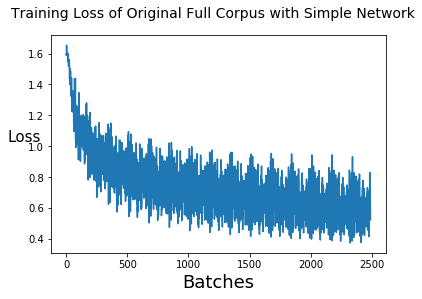

In [203]:
fig = plt.figure()

fig.suptitle('Training Loss of Original Full Corpus with Simple Network', fontsize=14)
plt.xlabel('Batches', fontsize=18)
plt.ylabel('Loss', fontsize=15,rotation=0)

plt.plot(losses)

plt.show()

In [208]:
import torch.optim as optim
import torch.nn as nn

epochs = 100
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []
    
    progress_bar = tqdm(total=len(train_loader_tfidf.dataset), desc='Epoch {}'.format(n_epoch + 1))
    
    model_tfidf.train()
    
    for x, y in train_loader_tfidf:

        x = x.to(device)
        y = y.to(device)
        optimizer_tfidf.zero_grad()
        
        pred = model_tfidf(x)
        
        loss = criterion_tfidf(pred, y)
        
        loss.backward()
        
        optimizer_tfidf.step()
        
        train_losses.append(loss.item())
        losses.append(loss.item())
        
        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    
    model_tfidf.eval()
    
    for x, y in validation_loader_tfidf:
        
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():

            pred = model_tfidf(x)

            pred = pred.cpu()
            y = y.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion_tfidf(pred, y)

            test_losses.append(loss.item())
        
    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)
    
    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))
        
    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break









Epoch 1:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 1:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.62]







Epoch 1:   1%|▎                                                  | 64/10623 [00:00<00:05, 1999.62it/s, train_loss=1.61]







Epoch 1:   1%|▌                                                 | 128/10623 [00:00<00:03, 3121.31it/s, train_loss=1.61]







Epoch 1:   2%|▉                                                 | 192/10623 [00:00<00:02, 3999.18it/s, train_loss=1.61]







Epoch 1:   2%|█▏                                                | 256/10623 [00:00<00:02, 4653.59it/s, train_loss=1.61]







Epoch 1:   3%|█▌                                                 | 320/10623 [00:00<00:02, 5078.27it/s, train_loss=1.6]







Epoch 1:   4%|█▊                                                 | 384/10623 [00:00<00:01, 5407.32it/s,

Epoch 1:  71%|██████████████████████████████████▊              | 7552/10623 [00:00<00:00, 8281.53it/s, train_loss=1.47]







Epoch 1:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8281.53it/s, train_loss=1.47]







Epoch 1:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8281.53it/s, train_loss=1.46]







Epoch 1:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8281.53it/s, train_loss=1.46]







Epoch 1:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8281.53it/s, train_loss=1.46]







Epoch 1:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8281.53it/s, train_loss=1.46]







Epoch 1:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8281.53it/s, train_loss=1.46]







Epoch 1:  75%|████████████████████████████████████▉            | 8000/10623 [00:00<00:00, 8281.53it/s, train_lo


Losses: train - 1.422, test - 1.271
F1 test - 0.434










Epoch 2:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 2:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.42]







Epoch 2:   1%|▎                                                  | 64/10623 [00:00<00:02, 4265.76it/s, train_loss=1.42]







Epoch 2:   1%|▌                                                 | 128/10623 [00:00<00:01, 5563.89it/s, train_loss=1.42]







Epoch 2:   2%|▉                                                 | 192/10623 [00:00<00:01, 6398.68it/s, train_loss=1.42]







Epoch 2:   2%|█▏                                                | 256/10623 [00:00<00:01, 6735.26it/s, train_loss=1.42]







Epoch 2:   3%|█▌                                                | 320/10623 [00:00<00:01, 6806.97it/s, train_loss=1.42]







Epoch 2:   4%|█▊                                                | 384/10623 [00:00<00:01, 7109.62it/s, 

Epoch 2:  71%|██████████████████████████████████▊              | 7552/10623 [00:00<00:00, 8026.24it/s, train_loss=1.36]







Epoch 2:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8026.24it/s, train_loss=1.36]







Epoch 2:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8026.24it/s, train_loss=1.36]







Epoch 2:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8026.24it/s, train_loss=1.36]







Epoch 2:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8026.24it/s, train_loss=1.36]







Epoch 2:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8026.24it/s, train_loss=1.36]







Epoch 2:  75%|████████████████████████████████████▌            | 7936/10623 [00:01<00:00, 8026.24it/s, train_loss=1.36]







Epoch 2:  75%|████████████████████████████████████▉            | 8000/10623 [00:01<00:00, 8026.24it/s, train_lo


Losses: train - 1.264, test - 1.215
F1 test - 0.478










Epoch 3:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 3:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.34]







Epoch 3:   1%|▎                                                  | 64/10623 [00:00<00:02, 3999.46it/s, train_loss=1.34]







Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:01, 5332.45it/s, train_loss=1.34]







Epoch 3:   2%|▉                                                 | 192/10623 [00:00<00:01, 6192.52it/s, train_loss=1.34]







Epoch 3:   2%|█▏                                                | 256/10623 [00:00<00:01, 6562.97it/s, train_loss=1.34]







Epoch 3:   3%|█▌                                                | 320/10623 [00:00<00:01, 6807.10it/s, train_loss=1.34]







Epoch 3:   4%|█▊                                                | 384/10623 [00:00<00:01, 7109.74it/s, 

Epoch 3:  71%|██████████████████████████████████▊              | 7552/10623 [00:00<00:00, 7999.88it/s, train_loss=1.32]







Epoch 3:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 7999.88it/s, train_loss=1.32]







Epoch 3:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 7999.88it/s, train_loss=1.32]







Epoch 3:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 7999.88it/s, train_loss=1.32]







Epoch 3:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 7999.88it/s, train_loss=1.32]







Epoch 3:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 7999.88it/s, train_loss=1.32]







Epoch 3:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 7999.88it/s, train_loss=1.32]







Epoch 3:  75%|████████████████████████████████████▉            | 8000/10623 [00:01<00:00, 7999.88it/s, train_lo


Losses: train - 1.239, test - 1.190
F1 test - 0.494










Epoch 4:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 4:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.31]







Epoch 4:   1%|▎                                                  | 64/10623 [00:00<00:02, 3999.22it/s, train_loss=1.31]







Epoch 4:   1%|▌                                                 | 128/10623 [00:00<00:01, 5332.24it/s, train_loss=1.31]







Epoch 4:   2%|▉                                                 | 192/10623 [00:00<00:01, 5998.74it/s, train_loss=1.31]







Epoch 4:   2%|█▏                                                | 256/10623 [00:00<00:01, 6398.59it/s, train_loss=1.31]







Epoch 4:   3%|█▌                                                | 320/10623 [00:00<00:01, 6665.20it/s, train_loss=1.31]







Epoch 4:   4%|█▊                                                 | 384/10623 [00:00<00:01, 6855.68it/s,

Epoch 4:  71%|██████████████████████████████████▊              | 7552/10623 [00:00<00:00, 7992.97it/s, train_loss=1.25]







Epoch 4:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 7992.97it/s, train_loss=1.25]







Epoch 4:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 7992.97it/s, train_loss=1.25]







Epoch 4:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 7992.97it/s, train_loss=1.25]







Epoch 4:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 7992.97it/s, train_loss=1.25]







Epoch 4:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 7992.97it/s, train_loss=1.25]







Epoch 4:  75%|████████████████████████████████████▌            | 7936/10623 [00:01<00:00, 7992.97it/s, train_loss=1.25]







Epoch 4:  75%|████████████████████████████████████▉            | 8000/10623 [00:01<00:00, 7992.97it/s, train_lo


Losses: train - 1.223, test - 1.184
F1 test - 0.504










Epoch 5:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 5:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.24]







Epoch 5:   1%|▎                                                  | 64/10623 [00:00<00:02, 4265.62it/s, train_loss=1.24]







Epoch 5:   1%|▌                                                 | 128/10623 [00:00<00:01, 5564.12it/s, train_loss=1.24]







Epoch 5:   2%|▉                                                 | 192/10623 [00:00<00:01, 5998.65it/s, train_loss=1.24]







Epoch 5:   2%|█▏                                                | 256/10623 [00:00<00:01, 6398.63it/s, train_loss=1.24]







Epoch 5:   3%|█▌                                                | 320/10623 [00:00<00:01, 6665.20it/s, train_loss=1.24]







Epoch 5:   4%|█▊                                                | 384/10623 [00:00<00:01, 6855.68it/s, 

Epoch 5:  71%|██████████████████████████████████▊              | 7552/10623 [00:00<00:00, 8050.92it/s, train_loss=1.23]







Epoch 5:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8050.92it/s, train_loss=1.23]







Epoch 5:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8050.92it/s, train_loss=1.23]







Epoch 5:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8050.92it/s, train_loss=1.23]







Epoch 5:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8050.92it/s, train_loss=1.23]







Epoch 5:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8050.92it/s, train_loss=1.23]







Epoch 5:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8050.92it/s, train_loss=1.23]







Epoch 5:  75%|████████████████████████████████████▉            | 8000/10623 [00:00<00:00, 8050.92it/s, train_lo


Losses: train - 1.210, test - 1.175
F1 test - 0.508










Epoch 6:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 6:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.22]







Epoch 6:   1%|▎                                                  | 64/10623 [00:00<00:02, 3998.92it/s, train_loss=1.22]







Epoch 6:   1%|▌                                                 | 128/10623 [00:00<00:01, 5816.71it/s, train_loss=1.22]







Epoch 6:   2%|▉                                                 | 192/10623 [00:00<00:01, 6619.16it/s, train_loss=1.22]







Epoch 6:   2%|█▏                                                | 256/10623 [00:00<00:01, 6917.24it/s, train_loss=1.22]







Epoch 6:   3%|█▌                                                | 320/10623 [00:00<00:01, 7271.09it/s, train_loss=1.22]







Epoch 6:   4%|█▊                                                | 384/10623 [00:00<00:01, 7243.66it/s, 

Epoch 6:  71%|██████████████████████████████████▊              | 7552/10623 [00:00<00:00, 8126.24it/s, train_loss=1.21]







Epoch 6:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8126.24it/s, train_loss=1.21]







Epoch 6:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8126.24it/s, train_loss=1.21]







Epoch 6:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8126.24it/s, train_loss=1.21]







Epoch 6:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8126.24it/s, train_loss=1.21]







Epoch 6:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8126.24it/s, train_loss=1.21]







Epoch 6:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8126.24it/s, train_loss=1.21]







Epoch 6:  75%|████████████████████████████████████▉            | 8000/10623 [00:00<00:00, 8126.24it/s, train_lo


Losses: train - 1.199, test - 1.167
F1 test - 0.513










Epoch 7:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 7:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.21]







Epoch 7:   1%|▎                                                  | 64/10623 [00:00<00:02, 4570.59it/s, train_loss=1.21]







Epoch 7:   1%|▌                                                 | 128/10623 [00:00<00:01, 5564.18it/s, train_loss=1.21]







Epoch 7:   2%|▉                                                 | 192/10623 [00:00<00:01, 6398.63it/s, train_loss=1.21]







Epoch 7:   2%|█▏                                                | 256/10623 [00:00<00:01, 6917.46it/s, train_loss=1.21]







Epoch 7:   3%|█▌                                                | 320/10623 [00:00<00:01, 7271.13it/s, train_loss=1.21]







Epoch 7:   4%|█▊                                                | 384/10623 [00:00<00:01, 7527.81it/s, 

Epoch 7:  72%|███████████████████████████████████▊              | 7616/10623 [00:00<00:00, 8227.73it/s, train_loss=1.2]







Epoch 7:  72%|████████████████████████████████████▏             | 7680/10623 [00:00<00:00, 8230.16it/s, train_loss=1.2]







Epoch 7:  72%|████████████████████████████████████▏             | 7680/10623 [00:00<00:00, 8230.16it/s, train_loss=1.2]







Epoch 7:  73%|████████████████████████████████████▍             | 7744/10623 [00:00<00:00, 8230.16it/s, train_loss=1.2]







Epoch 7:  74%|████████████████████████████████████▊             | 7808/10623 [00:00<00:00, 8230.16it/s, train_loss=1.2]







Epoch 7:  74%|█████████████████████████████████████             | 7872/10623 [00:00<00:00, 8230.16it/s, train_loss=1.2]







Epoch 7:  75%|█████████████████████████████████████▎            | 7936/10623 [00:00<00:00, 8230.16it/s, train_loss=1.2]







Epoch 7:  75%|█████████████████████████████████████▋            | 8000/10623 [00:00<00:00, 8230.16it/s, train_l


Losses: train - 1.189, test - 1.158
F1 test - 0.516










Epoch 8:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 8:   0%|                                                               | 0/10623 [00:00<?, ?it/s, train_loss=1.2]







Epoch 8:   1%|▎                                                   | 64/10623 [00:00<00:02, 4265.76it/s, train_loss=1.2]







Epoch 8:   1%|▌                                                  | 128/10623 [00:00<00:01, 6094.02it/s, train_loss=1.2]







Epoch 8:   2%|▉                                                  | 192/10623 [00:00<00:01, 6619.37it/s, train_loss=1.2]







Epoch 8:   2%|█▏                                                 | 256/10623 [00:00<00:01, 7109.60it/s, train_loss=1.2]







Epoch 8:   3%|█▌                                                 | 320/10623 [00:00<00:01, 7617.52it/s, train_loss=1.2]







Epoch 8:   4%|█▊                                                 | 384/10623 [00:00<00:01, 7678.43it/s,

Epoch 8:  71%|██████████████████████████████████▊              | 7552/10623 [00:00<00:00, 8204.68it/s, train_loss=1.19]







Epoch 8:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8204.68it/s, train_loss=1.19]







Epoch 8:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8204.68it/s, train_loss=1.19]







Epoch 8:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8204.68it/s, train_loss=1.19]







Epoch 8:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8204.68it/s, train_loss=1.19]







Epoch 8:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8204.68it/s, train_loss=1.19]







Epoch 8:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8204.68it/s, train_loss=1.19]







Epoch 8:  75%|████████████████████████████████████▉            | 8000/10623 [00:00<00:00, 8204.68it/s, train_lo


Losses: train - 1.180, test - 1.143
F1 test - 0.525










Epoch 9:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 9:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.19]







Epoch 9:   1%|▎                                                  | 64/10623 [00:00<00:02, 3999.04it/s, train_loss=1.19]







Epoch 9:   1%|▌                                                 | 128/10623 [00:00<00:01, 5563.95it/s, train_loss=1.19]







Epoch 9:   2%|▉                                                 | 192/10623 [00:00<00:01, 6192.09it/s, train_loss=1.19]







Epoch 9:   2%|█▏                                                | 256/10623 [00:00<00:01, 6917.41it/s, train_loss=1.19]







Epoch 9:   3%|█▌                                                | 320/10623 [00:00<00:01, 7109.44it/s, train_loss=1.19]







Epoch 9:   4%|█▊                                                | 384/10623 [00:00<00:01, 7243.49it/s, 

Epoch 9:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8387.45it/s, train_loss=1.18]







Epoch 9:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8387.45it/s, train_loss=1.18]







Epoch 9:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8387.45it/s, train_loss=1.18]







Epoch 9:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8382.84it/s, train_loss=1.18]







Epoch 9:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8382.84it/s, train_loss=1.18]







Epoch 9:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8382.84it/s, train_loss=1.18]







Epoch 9:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8382.84it/s, train_loss=1.18]







Epoch 9:  75%|████████████████████████████████████▉            | 8000/10623 [00:00<00:00, 8382.84it/s, train_lo


Losses: train - 1.170, test - 1.144
F1 test - 0.524
Early stopping


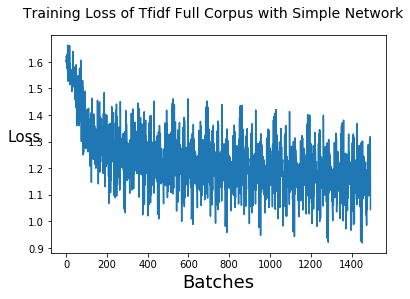

In [209]:
fig = plt.figure()

fig.suptitle('Training Loss of Tfidf Full Corpus with Simple Network', fontsize=14)
plt.xlabel('Batches', fontsize=18)
plt.ylabel('Loss', fontsize=15,rotation=0)

plt.plot(losses)

plt.show()

In [204]:
import torch.optim as optim
import torch.nn as nn

epochs = 100
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []
    
    progress_bar = tqdm(total=len(train_loader_reduced.dataset), desc='Epoch {}'.format(n_epoch + 1))
    
    model_reduced.train()
    
    for x, y in train_loader_reduced:

        x = x.to(device)
        y = y.to(device)
        optimizer_reduced.zero_grad()
        
        pred = model_reduced(x)
        
        loss = criterion_reduced(pred, y)
        
        loss.backward()
        
        optimizer_reduced.step()
        
        train_losses.append(loss.item())
        losses.append(loss.item())
        
        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    
    model_reduced.eval()
    
    for x, y in validation_loader_reduced:
        
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():

            pred = model_reduced(x)

            pred = pred.cpu()
            y = y.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion_reduced(pred, y)

            test_losses.append(loss.item())
        
    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)
    
    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))
        
    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break









Epoch 1:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 1:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.61]







Epoch 1:   1%|▎                                                  | 64/10623 [00:00<00:05, 1828.16it/s, train_loss=1.61]







Epoch 1:   1%|▌                                                 | 128/10623 [00:00<00:03, 2976.09it/s, train_loss=1.61]







Epoch 1:   2%|▉                                                 | 192/10623 [00:00<00:02, 3763.87it/s, train_loss=1.61]







Epoch 1:   2%|█▏                                                | 256/10623 [00:00<00:02, 4338.02it/s, train_loss=1.61]







Epoch 1:   3%|█▌                                                | 320/10623 [00:00<00:02, 4704.85it/s, train_loss=1.61]







Epoch 1:   4%|█▊                                                | 384/10623 [00:00<00:02, 4922.00it/s, 

Epoch 1:  70%|██████████████████████████████████▌              | 7488/10623 [00:01<00:00, 6935.88it/s, train_loss=1.36]







Epoch 1:  71%|██████████████████████████████████▊              | 7552/10623 [00:01<00:00, 6935.88it/s, train_loss=1.36]







Epoch 1:  72%|███████████████████████████████████▏             | 7616/10623 [00:01<00:00, 6935.88it/s, train_loss=1.36]







Epoch 1:  72%|███████████████████████████████████▍             | 7680/10623 [00:01<00:00, 6935.88it/s, train_loss=1.36]







Epoch 1:  73%|███████████████████████████████████▋             | 7744/10623 [00:01<00:00, 6935.88it/s, train_loss=1.36]







Epoch 1:  74%|████████████████████████████████████             | 7808/10623 [00:01<00:00, 6844.41it/s, train_loss=1.36]







Epoch 1:  74%|████████████████████████████████████             | 7808/10623 [00:01<00:00, 6844.41it/s, train_loss=1.35]







Epoch 1:  74%|████████████████████████████████████▎            | 7872/10623 [00:01<00:00, 6844.41it/s, train_lo


Losses: train - 1.285, test - 1.033
F1 test - 0.638










Epoch 2:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 2:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.28]







Epoch 2:   1%|▎                                                  | 64/10623 [00:00<00:02, 3554.73it/s, train_loss=1.28]







Epoch 2:   1%|▌                                                 | 128/10623 [00:00<00:02, 4739.79it/s, train_loss=1.28]







Epoch 2:   2%|▉                                                 | 192/10623 [00:00<00:02, 5188.06it/s, train_loss=1.28]







Epoch 2:   2%|█▏                                                | 256/10623 [00:00<00:01, 5445.60it/s, train_loss=1.28]







Epoch 2:   3%|█▌                                                | 320/10623 [00:00<00:01, 5816.91it/s, train_loss=1.28]







Epoch 2:   4%|█▊                                                | 384/10623 [00:00<00:01, 6093.88it/s, 

Epoch 2:  70%|██████████████████████████████████▌              | 7488/10623 [00:01<00:00, 7235.95it/s, train_loss=1.18]







Epoch 2:  71%|██████████████████████████████████▊              | 7552/10623 [00:01<00:00, 7235.95it/s, train_loss=1.18]







Epoch 2:  72%|███████████████████████████████████▏             | 7616/10623 [00:01<00:00, 7235.95it/s, train_loss=1.18]







Epoch 2:  72%|███████████████████████████████████▍             | 7680/10623 [00:01<00:00, 7235.95it/s, train_loss=1.18]







Epoch 2:  73%|███████████████████████████████████▋             | 7744/10623 [00:01<00:00, 7235.95it/s, train_loss=1.18]







Epoch 2:  74%|████████████████████████████████████             | 7808/10623 [00:01<00:00, 7235.95it/s, train_loss=1.18]







Epoch 2:  74%|████████████████████████████████████▎            | 7872/10623 [00:01<00:00, 7235.95it/s, train_loss=1.17]







Epoch 2:  75%|████████████████████████████████████▌            | 7936/10623 [00:01<00:00, 7235.95it/s, train_lo


Losses: train - 1.011, test - 0.944
F1 test - 0.675










Epoch 3:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 3:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.15]







Epoch 3:   1%|▎                                                  | 64/10623 [00:00<00:02, 3763.87it/s, train_loss=1.15]







Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:02, 4739.70it/s, train_loss=1.15]







Epoch 3:   2%|▉                                                 | 192/10623 [00:00<00:02, 5188.09it/s, train_loss=1.15]







Epoch 3:   2%|█▏                                                | 256/10623 [00:00<00:01, 5332.10it/s, train_loss=1.15]







Epoch 3:   3%|█▌                                                | 320/10623 [00:00<00:01, 5422.57it/s, train_loss=1.15]







Epoch 3:   4%|█▊                                                | 384/10623 [00:00<00:01, 5730.13it/s, 

Epoch 3:  71%|███████████████████████████████████▌              | 7552/10623 [00:01<00:00, 7240.68it/s, train_loss=1.1]







Epoch 3:  71%|███████████████████████████████████▌              | 7552/10623 [00:01<00:00, 7240.68it/s, train_loss=1.1]







Epoch 3:  72%|███████████████████████████████████▊              | 7616/10623 [00:01<00:00, 7240.68it/s, train_loss=1.1]







Epoch 3:  72%|████████████████████████████████████▏             | 7680/10623 [00:01<00:00, 7240.68it/s, train_loss=1.1]







Epoch 3:  73%|████████████████████████████████████▍             | 7744/10623 [00:01<00:00, 7240.68it/s, train_loss=1.1]







Epoch 3:  74%|████████████████████████████████████▊             | 7808/10623 [00:01<00:00, 7240.68it/s, train_loss=1.1]







Epoch 3:  74%|████████████████████████████████████▎            | 7872/10623 [00:01<00:00, 7240.68it/s, train_loss=1.09]







Epoch 3:  75%|████████████████████████████████████▌            | 7936/10623 [00:01<00:00, 7240.68it/s, train_lo


Losses: train - 0.942, test - 0.905
F1 test - 0.676










Epoch 4:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 4:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.08]







Epoch 4:   1%|▎                                                  | 64/10623 [00:00<00:02, 3554.68it/s, train_loss=1.08]







Epoch 4:   1%|▌                                                 | 128/10623 [00:00<00:02, 4921.99it/s, train_loss=1.08]







Epoch 4:   2%|▉                                                 | 192/10623 [00:00<00:01, 5484.43it/s, train_loss=1.08]







Epoch 4:   2%|█▏                                                | 256/10623 [00:00<00:01, 5952.07it/s, train_loss=1.07]







Epoch 4:   3%|█▌                                                | 320/10623 [00:00<00:01, 6273.15it/s, train_loss=1.07]







Epoch 4:   4%|█▊                                                | 384/10623 [00:00<00:01, 6398.61it/s, 

Epoch 4:  71%|██████████████████████████████████              | 7552/10623 [00:01<00:00, 7314.16it/s, train_loss=0.972]







Epoch 4:  72%|██████████████████████████████████▍             | 7616/10623 [00:01<00:00, 7314.16it/s, train_loss=0.971]







Epoch 4:  72%|██████████████████████████████████▋             | 7680/10623 [00:01<00:00, 7314.16it/s, train_loss=0.971]







Epoch 4:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7251.54it/s, train_loss=0.971]







Epoch 4:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7251.54it/s, train_loss=0.971]







Epoch 4:  74%|████████████████████████████████████             | 7808/10623 [00:01<00:00, 7251.54it/s, train_loss=0.97]







Epoch 4:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7251.54it/s, train_loss=0.969]







Epoch 4:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 7251.54it/s, train_los


Losses: train - 0.900, test - 0.881
F1 test - 0.686










Epoch 5:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 5:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.951]







Epoch 5:   1%|▎                                                 | 64/10623 [00:00<00:02, 3763.82it/s, train_loss=0.951]







Epoch 5:   1%|▌                                                 | 128/10623 [00:00<00:02, 4921.99it/s, train_loss=0.95]







Epoch 5:   2%|▉                                                 | 192/10623 [00:00<00:01, 5645.77it/s, train_loss=0.95]







Epoch 5:   2%|█▏                                                | 256/10623 [00:00<00:01, 6093.95it/s, train_loss=0.95]







Epoch 5:   3%|█▌                                                | 320/10623 [00:00<00:01, 6273.06it/s, train_loss=0.95]







Epoch 5:   4%|█▊                                               | 384/10623 [00:00<00:01, 6507.00it/s, t

Epoch 5:  71%|██████████████████████████████████              | 7552/10623 [00:01<00:00, 7180.54it/s, train_loss=0.916]







Epoch 5:  71%|██████████████████████████████████              | 7552/10623 [00:01<00:00, 7180.54it/s, train_loss=0.915]







Epoch 5:  72%|██████████████████████████████████▍             | 7616/10623 [00:01<00:00, 7180.54it/s, train_loss=0.914]







Epoch 5:  72%|██████████████████████████████████▋             | 7680/10623 [00:01<00:00, 7180.54it/s, train_loss=0.914]







Epoch 5:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7180.54it/s, train_loss=0.914]







Epoch 5:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 7180.54it/s, train_loss=0.914]







Epoch 5:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7180.54it/s, train_loss=0.914]







Epoch 5:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 7180.54it/s, train_los


Losses: train - 0.869, test - 0.864
F1 test - 0.693










Epoch 6:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 6:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.904]







Epoch 6:   1%|▎                                                 | 64/10623 [00:00<00:02, 3763.76it/s, train_loss=0.903]







Epoch 6:   1%|▌                                                | 128/10623 [00:00<00:02, 5118.81it/s, train_loss=0.903]







Epoch 6:   2%|▉                                                | 192/10623 [00:00<00:01, 5645.81it/s, train_loss=0.903]







Epoch 6:   2%|█▏                                               | 256/10623 [00:00<00:01, 6093.88it/s, train_loss=0.903]







Epoch 6:   3%|█▍                                               | 320/10623 [00:00<00:01, 6273.15it/s, train_loss=0.903]







Epoch 6:   4%|█▊                                               | 384/10623 [00:00<00:01, 6398.56it/s, t

Epoch 6:  71%|██████████████████████████████████              | 7552/10623 [00:01<00:00, 7242.37it/s, train_loss=0.879]







Epoch 6:  72%|██████████████████████████████████▍             | 7616/10623 [00:01<00:00, 7263.33it/s, train_loss=0.879]







Epoch 6:  72%|██████████████████████████████████▍             | 7616/10623 [00:01<00:00, 7263.33it/s, train_loss=0.879]







Epoch 6:  72%|██████████████████████████████████▋             | 7680/10623 [00:01<00:00, 7263.33it/s, train_loss=0.879]







Epoch 6:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7263.33it/s, train_loss=0.879]







Epoch 6:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 7263.33it/s, train_loss=0.879]







Epoch 6:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7263.33it/s, train_loss=0.879]







Epoch 6:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 7263.33it/s, train_los


Losses: train - 0.844, test - 0.849
F1 test - 0.693










Epoch 7:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 7:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.871]







Epoch 7:   1%|▎                                                 | 64/10623 [00:00<00:03, 3367.65it/s, train_loss=0.871]







Epoch 7:   1%|▌                                                | 128/10623 [00:00<00:02, 4570.32it/s, train_loss=0.871]







Epoch 7:   2%|▉                                                | 192/10623 [00:00<00:01, 5332.13it/s, train_loss=0.871]







Epoch 7:   2%|█▏                                               | 256/10623 [00:00<00:01, 5816.84it/s, train_loss=0.871]







Epoch 7:   3%|█▍                                               | 320/10623 [00:00<00:01, 6036.33it/s, train_loss=0.871]







Epoch 7:   4%|█▊                                                | 384/10623 [00:00<00:01, 6293.64it/s, 

Epoch 7:  71%|██████████████████████████████████              | 7552/10623 [00:01<00:00, 7309.08it/s, train_loss=0.852]







Epoch 7:  72%|██████████████████████████████████▍             | 7616/10623 [00:01<00:00, 7225.73it/s, train_loss=0.852]







Epoch 7:  72%|██████████████████████████████████▍             | 7616/10623 [00:01<00:00, 7225.73it/s, train_loss=0.851]







Epoch 7:  72%|██████████████████████████████████▋             | 7680/10623 [00:01<00:00, 7225.73it/s, train_loss=0.852]







Epoch 7:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7225.73it/s, train_loss=0.852]







Epoch 7:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 7225.73it/s, train_loss=0.851]







Epoch 7:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7225.73it/s, train_loss=0.852]







Epoch 7:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 7225.73it/s, train_los


Losses: train - 0.822, test - 0.839
F1 test - 0.702










Epoch 8:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 8:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.845]







Epoch 8:   1%|▎                                                 | 64/10623 [00:00<00:02, 3554.82it/s, train_loss=0.845]







Epoch 8:   1%|▌                                                | 128/10623 [00:00<00:02, 4921.99it/s, train_loss=0.845]







Epoch 8:   2%|▉                                                | 192/10623 [00:00<00:01, 5645.92it/s, train_loss=0.845]







Epoch 8:   2%|█▏                                               | 256/10623 [00:00<00:01, 5952.24it/s, train_loss=0.845]







Epoch 8:   3%|█▍                                               | 320/10623 [00:00<00:01, 6152.51it/s, train_loss=0.845]







Epoch 8:   4%|█▊                                               | 384/10623 [00:00<00:01, 6293.74it/s, t

Epoch 8:  71%|██████████████████████████████████▊              | 7552/10623 [00:01<00:00, 7239.54it/s, train_loss=0.83]







Epoch 8:  71%|██████████████████████████████████              | 7552/10623 [00:01<00:00, 7239.54it/s, train_loss=0.829]







Epoch 8:  72%|██████████████████████████████████▍             | 7616/10623 [00:01<00:00, 7239.54it/s, train_loss=0.828]







Epoch 8:  72%|██████████████████████████████████▋             | 7680/10623 [00:01<00:00, 7239.54it/s, train_loss=0.829]







Epoch 8:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7239.54it/s, train_loss=0.829]







Epoch 8:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 7239.54it/s, train_loss=0.828]







Epoch 8:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7239.54it/s, train_loss=0.829]







Epoch 8:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 7239.54it/s, train_los


Losses: train - 0.802, test - 0.839
F1 test - 0.702










Epoch 9:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 9:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.823]







Epoch 9:   1%|▎                                                 | 64/10623 [00:00<00:02, 3764.03it/s, train_loss=0.823]







Epoch 9:   1%|▌                                                | 128/10623 [00:00<00:02, 4922.12it/s, train_loss=0.823]







Epoch 9:   2%|▉                                                | 192/10623 [00:00<00:01, 5645.81it/s, train_loss=0.823]







Epoch 9:   2%|█▏                                               | 256/10623 [00:00<00:01, 5952.27it/s, train_loss=0.822]







Epoch 9:   3%|█▍                                               | 320/10623 [00:00<00:01, 6152.49it/s, train_loss=0.822]







Epoch 9:   4%|█▊                                               | 384/10623 [00:00<00:01, 6398.56it/s, t

Epoch 9:  71%|██████████████████████████████████              | 7552/10623 [00:01<00:00, 7347.98it/s, train_loss=0.808]







Epoch 9:  72%|██████████████████████████████████▍             | 7616/10623 [00:01<00:00, 7347.98it/s, train_loss=0.808]







Epoch 9:  72%|██████████████████████████████████▋             | 7680/10623 [00:01<00:00, 7401.00it/s, train_loss=0.808]







Epoch 9:  72%|██████████████████████████████████▋             | 7680/10623 [00:01<00:00, 7401.00it/s, train_loss=0.808]







Epoch 9:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7401.00it/s, train_loss=0.808]







Epoch 9:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 7401.00it/s, train_loss=0.808]







Epoch 9:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7401.00it/s, train_loss=0.808]







Epoch 9:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 7401.00it/s, train_los


Losses: train - 0.784, test - 0.837
F1 test - 0.707










Epoch 10:   0%|                                                                              | 0/10623 [00:00<?, ?it/s]







Epoch 10:   0%|                                                            | 0/10623 [00:00<?, ?it/s, train_loss=0.803]







Epoch 10:   1%|▎                                                | 64/10623 [00:00<00:02, 3763.87it/s, train_loss=0.803]







Epoch 10:   1%|▌                                               | 128/10623 [00:00<00:02, 4921.94it/s, train_loss=0.803]







Epoch 10:   2%|▊                                               | 192/10623 [00:00<00:01, 5645.84it/s, train_loss=0.803]







Epoch 10:   2%|█▏                                              | 256/10623 [00:00<00:01, 5952.24it/s, train_loss=0.803]







Epoch 10:   3%|█▍                                              | 320/10623 [00:00<00:01, 6152.43it/s, train_loss=0.803]







Epoch 10:   4%|█▋                                              | 384/10623 [00:00<00:01, 6293.67it/s, t

Epoch 10:  71%|█████████████████████████████████▍             | 7552/10623 [00:01<00:00, 7233.20it/s, train_loss=0.791]







Epoch 10:  71%|██████████████████████████████████              | 7552/10623 [00:01<00:00, 7233.20it/s, train_loss=0.79]







Epoch 10:  72%|█████████████████████████████████▋             | 7616/10623 [00:01<00:00, 7233.20it/s, train_loss=0.789]







Epoch 10:  72%|██████████████████████████████████▋             | 7680/10623 [00:01<00:00, 7233.20it/s, train_loss=0.79]







Epoch 10:  73%|██████████████████████████████████▉             | 7744/10623 [00:01<00:00, 7233.20it/s, train_loss=0.79]







Epoch 10:  74%|███████████████████████████████████▎            | 7808/10623 [00:01<00:00, 7233.20it/s, train_loss=0.79]







Epoch 10:  74%|███████████████████████████████████▌            | 7872/10623 [00:01<00:00, 7233.20it/s, train_loss=0.79]







Epoch 10:  75%|███████████████████████████████████▊            | 7936/10623 [00:01<00:00, 7233.20it/s, train_lo


Losses: train - 0.769, test - 0.837
F1 test - 0.704










Epoch 11:   0%|                                                                              | 0/10623 [00:00<?, ?it/s]







Epoch 11:   0%|                                                            | 0/10623 [00:00<?, ?it/s, train_loss=0.785]







Epoch 11:   1%|▎                                                | 64/10623 [00:00<00:02, 3999.22it/s, train_loss=0.785]







Epoch 11:   1%|▌                                               | 128/10623 [00:00<00:02, 5118.96it/s, train_loss=0.785]







Epoch 11:   2%|▊                                               | 192/10623 [00:00<00:01, 5645.65it/s, train_loss=0.785]







Epoch 11:   2%|█▏                                              | 256/10623 [00:00<00:01, 5952.24it/s, train_loss=0.785]







Epoch 11:   3%|█▍                                              | 320/10623 [00:00<00:01, 6152.54it/s, train_loss=0.785]







Epoch 11:   4%|█▋                                              | 384/10623 [00:00<00:01, 6398.61it/s, t

Epoch 11:  71%|█████████████████████████████████▍             | 7552/10623 [00:01<00:00, 7247.01it/s, train_loss=0.774]







Epoch 11:  71%|█████████████████████████████████▍             | 7552/10623 [00:01<00:00, 7247.01it/s, train_loss=0.773]







Epoch 11:  72%|█████████████████████████████████▋             | 7616/10623 [00:01<00:00, 7247.01it/s, train_loss=0.772]







Epoch 11:  72%|█████████████████████████████████▉             | 7680/10623 [00:01<00:00, 7247.01it/s, train_loss=0.773]







Epoch 11:  73%|██████████████████████████████████▎            | 7744/10623 [00:01<00:00, 7247.01it/s, train_loss=0.773]







Epoch 11:  74%|██████████████████████████████████▌            | 7808/10623 [00:01<00:00, 7247.01it/s, train_loss=0.773]







Epoch 11:  74%|██████████████████████████████████▊            | 7872/10623 [00:01<00:00, 7247.01it/s, train_loss=0.773]







Epoch 11:  75%|███████████████████████████████████            | 7936/10623 [00:01<00:00, 7247.01it/s, train_los


Losses: train - 0.752, test - 0.837
F1 test - 0.699
Early stopping


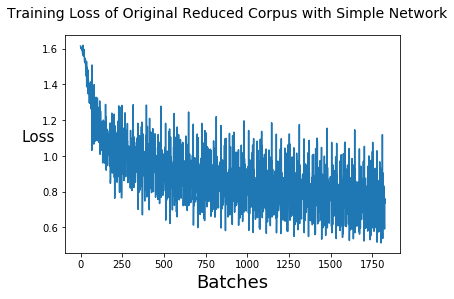

In [205]:
fig = plt.figure()

fig.suptitle('Training Loss of Original Reduced Corpus with Simple Network', fontsize=14)
plt.xlabel('Batches', fontsize=18)
plt.ylabel('Loss', fontsize=15,rotation=0)

plt.plot(losses)

plt.show()

F1 reduced full : 0.713

In [210]:
import torch.optim as optim
import torch.nn as nn

epochs = 100
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []
    
    progress_bar = tqdm(total=len(train_loader_reduced_tfidf.dataset), desc='Epoch {}'.format(n_epoch + 1))
    
    model_reduced_tfidf.train()
    
    for x, y in train_loader_reduced_tfidf:

        x = x.to(device)
        y = y.to(device)
        optimizer_reduced_tfidf.zero_grad()
        
        pred = model_reduced_tfidf(x)
        
        loss = criterion_reduced_tfidf(pred, y)
        
        loss.backward()
        
        optimizer_reduced_tfidf.step()
        
        train_losses.append(loss.item())
        losses.append(loss.item())
        
        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    
    model_reduced_tfidf.eval()
    
    for x, y in validation_loader_reduced_tfidf:
        
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():

            pred = model_reduced_tfidf(x)

            pred = pred.cpu()
            y = y.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion_reduced_tfidf(pred, y)

            test_losses.append(loss.item())
        
    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)
    
    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))
        
    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break









Epoch 1:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 1:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.62]







Epoch 1:   1%|▎                                                  | 64/10623 [00:00<00:03, 2666.14it/s, train_loss=1.62]







Epoch 1:   1%|▌                                                 | 128/10623 [00:00<00:02, 4128.22it/s, train_loss=1.61]







Epoch 1:   2%|▉                                                 | 192/10623 [00:00<00:02, 5051.54it/s, train_loss=1.61]







Epoch 1:   2%|█▏                                                | 256/10623 [00:00<00:01, 5687.70it/s, train_loss=1.61]







Epoch 1:   3%|█▌                                                | 320/10623 [00:00<00:01, 6152.49it/s, train_loss=1.61]







Epoch 1:   4%|█▊                                                | 384/10623 [00:00<00:01, 6507.05it/s, 

Epoch 1:  71%|██████████████████████████████████▊              | 7552/10623 [00:00<00:00, 8129.63it/s, train_loss=1.54]







Epoch 1:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8129.63it/s, train_loss=1.54]







Epoch 1:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8129.63it/s, train_loss=1.54]







Epoch 1:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8129.63it/s, train_loss=1.54]







Epoch 1:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8129.63it/s, train_loss=1.54]







Epoch 1:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8129.63it/s, train_loss=1.54]







Epoch 1:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8129.63it/s, train_loss=1.54]







Epoch 1:  75%|████████████████████████████████████▉            | 8000/10623 [00:01<00:00, 8129.63it/s, train_lo


Losses: train - 1.522, test - 1.517
F1 test - 0.336










Epoch 2:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 2:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.52]







Epoch 2:   1%|▎                                                  | 64/10623 [00:00<00:03, 3367.69it/s, train_loss=1.52]







Epoch 2:   1%|▌                                                 | 128/10623 [00:00<00:02, 4922.03it/s, train_loss=1.52]







Epoch 2:   2%|▉                                                 | 192/10623 [00:00<00:01, 5645.81it/s, train_loss=1.52]







Epoch 2:   2%|█▏                                                | 256/10623 [00:00<00:01, 6242.54it/s, train_loss=1.52]







Epoch 2:   3%|█▌                                                | 320/10623 [00:00<00:01, 6529.21it/s, train_loss=1.52]







Epoch 2:   4%|█▊                                                | 384/10623 [00:00<00:01, 6735.39it/s, 

Epoch 2:  71%|███████████████████████████████████▌              | 7552/10623 [00:00<00:00, 7949.66it/s, train_loss=1.5]







Epoch 2:  72%|███████████████████████████████████▊              | 7616/10623 [00:00<00:00, 7949.66it/s, train_loss=1.5]







Epoch 2:  72%|████████████████████████████████████▏             | 7680/10623 [00:00<00:00, 7949.66it/s, train_loss=1.5]







Epoch 2:  73%|████████████████████████████████████▍             | 7744/10623 [00:00<00:00, 7949.66it/s, train_loss=1.5]







Epoch 2:  74%|████████████████████████████████████▊             | 7808/10623 [00:00<00:00, 7949.66it/s, train_loss=1.5]







Epoch 2:  74%|█████████████████████████████████████             | 7872/10623 [00:01<00:00, 7949.66it/s, train_loss=1.5]







Epoch 2:  75%|█████████████████████████████████████▎            | 7936/10623 [00:01<00:00, 7949.66it/s, train_loss=1.5]







Epoch 2:  75%|█████████████████████████████████████▋            | 8000/10623 [00:01<00:00, 7949.66it/s, train_l


Losses: train - 1.459, test - 1.470
F1 test - 0.364










Epoch 3:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 3:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.49]







Epoch 3:   1%|▎                                                  | 64/10623 [00:00<00:02, 4265.69it/s, train_loss=1.49]







Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:02, 5118.81it/s, train_loss=1.49]







Epoch 3:   2%|▉                                                 | 192/10623 [00:00<00:01, 5998.60it/s, train_loss=1.49]







Epoch 3:   2%|█▏                                                | 256/10623 [00:00<00:01, 6562.65it/s, train_loss=1.49]







Epoch 3:   3%|█▌                                                | 320/10623 [00:00<00:01, 6806.86it/s, train_loss=1.49]







Epoch 3:   4%|█▊                                                | 384/10623 [00:00<00:01, 6980.21it/s, 

Epoch 3:  71%|██████████████████████████████████▊              | 7552/10623 [00:00<00:00, 8033.17it/s, train_loss=1.48]







Epoch 3:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8033.17it/s, train_loss=1.48]







Epoch 3:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8033.17it/s, train_loss=1.48]







Epoch 3:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8033.17it/s, train_loss=1.48]







Epoch 3:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8033.17it/s, train_loss=1.48]







Epoch 3:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8033.17it/s, train_loss=1.48]







Epoch 3:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8033.17it/s, train_loss=1.48]







Epoch 3:  75%|████████████████████████████████████▉            | 8000/10623 [00:01<00:00, 8033.17it/s, train_lo


Losses: train - 1.435, test - 1.435
F1 test - 0.381










Epoch 4:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 4:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.47]







Epoch 4:   1%|▎                                                  | 64/10623 [00:00<00:02, 3763.92it/s, train_loss=1.47]







Epoch 4:   1%|▌                                                 | 128/10623 [00:00<00:01, 5332.13it/s, train_loss=1.47]







Epoch 4:   2%|▉                                                 | 192/10623 [00:00<00:01, 6192.19it/s, train_loss=1.47]







Epoch 4:   2%|█▏                                                | 256/10623 [00:00<00:01, 6562.65it/s, train_loss=1.47]







Epoch 4:   3%|█▌                                                | 320/10623 [00:00<00:01, 6806.97it/s, train_loss=1.47]







Epoch 4:   4%|█▊                                                | 384/10623 [00:00<00:01, 7109.55it/s, 

Epoch 4:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8364.72it/s, train_loss=1.45]







Epoch 4:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8364.72it/s, train_loss=1.45]







Epoch 4:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8364.72it/s, train_loss=1.45]







Epoch 4:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8364.72it/s, train_loss=1.44]







Epoch 4:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8364.72it/s, train_loss=1.44]







Epoch 4:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8364.72it/s, train_loss=1.44]







Epoch 4:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8364.72it/s, train_loss=1.44]







Epoch 4:  75%|████████████████████████████████████▉            | 8000/10623 [00:00<00:00, 8364.72it/s, train_lo


Losses: train - 1.421, test - 1.428
F1 test - 0.380










Epoch 5:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 5:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.44]







Epoch 5:   1%|▎                                                  | 64/10623 [00:00<00:02, 4265.82it/s, train_loss=1.44]







Epoch 5:   1%|▌                                                 | 128/10623 [00:00<00:01, 5564.24it/s, train_loss=1.44]







Epoch 5:   2%|▉                                                 | 192/10623 [00:00<00:01, 6398.68it/s, train_loss=1.44]







Epoch 5:   2%|█▏                                                | 256/10623 [00:00<00:01, 6917.50it/s, train_loss=1.44]







Epoch 5:   3%|█▌                                                | 320/10623 [00:00<00:01, 7109.55it/s, train_loss=1.44]







Epoch 5:   4%|█▊                                                | 384/10623 [00:00<00:01, 7243.66it/s, 

Epoch 5:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8508.50it/s, train_loss=1.43]







Epoch 5:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8508.50it/s, train_loss=1.43]







Epoch 5:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8508.50it/s, train_loss=1.43]







Epoch 5:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8348.72it/s, train_loss=1.43]







Epoch 5:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8348.72it/s, train_loss=1.43]







Epoch 5:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8348.72it/s, train_loss=1.43]







Epoch 5:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8348.72it/s, train_loss=1.43]







Epoch 5:  75%|████████████████████████████████████▉            | 8000/10623 [00:00<00:00, 8348.72it/s, train_lo


Losses: train - 1.413, test - 1.422
F1 test - 0.381










Epoch 6:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 6:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.42]







Epoch 6:   1%|▎                                                  | 64/10623 [00:00<00:02, 3999.22it/s, train_loss=1.42]







Epoch 6:   1%|▌                                                 | 128/10623 [00:00<00:01, 5564.06it/s, train_loss=1.42]







Epoch 6:   2%|▉                                                 | 192/10623 [00:00<00:01, 6398.68it/s, train_loss=1.42]







Epoch 6:   2%|█▏                                                | 256/10623 [00:00<00:01, 6735.47it/s, train_loss=1.42]







Epoch 6:   3%|█▌                                                | 320/10623 [00:00<00:01, 7271.17it/s, train_loss=1.42]







Epoch 6:   4%|█▊                                                | 384/10623 [00:00<00:01, 7527.81it/s, 

Epoch 6:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8088.83it/s, train_loss=1.42]







Epoch 6:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8084.94it/s, train_loss=1.42]







Epoch 6:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8084.94it/s, train_loss=1.42]







Epoch 6:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8084.94it/s, train_loss=1.42]







Epoch 6:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8084.94it/s, train_loss=1.42]







Epoch 6:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8084.94it/s, train_loss=1.42]







Epoch 6:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8084.94it/s, train_loss=1.42]







Epoch 6:  75%|████████████████████████████████████▉            | 8000/10623 [00:00<00:00, 8084.94it/s, train_lo


Losses: train - 1.406, test - 1.417
F1 test - 0.395










Epoch 7:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 7:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.41]







Epoch 7:   1%|▎                                                  | 64/10623 [00:00<00:02, 3999.16it/s, train_loss=1.41]







Epoch 7:   1%|▌                                                 | 128/10623 [00:00<00:01, 5332.18it/s, train_loss=1.41]







Epoch 7:   2%|▉                                                 | 192/10623 [00:00<00:01, 6192.28it/s, train_loss=1.41]







Epoch 7:   2%|█▏                                                | 256/10623 [00:00<00:01, 6398.67it/s, train_loss=1.41]







Epoch 7:   3%|█▌                                                | 320/10623 [00:00<00:01, 6807.10it/s, train_loss=1.41]







Epoch 7:   4%|█▊                                                | 384/10623 [00:00<00:01, 7109.62it/s, 

Epoch 7:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8204.03it/s, train_loss=1.41]







Epoch 7:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8392.91it/s, train_loss=1.41]







Epoch 7:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8392.91it/s, train_loss=1.41]







Epoch 7:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8392.91it/s, train_loss=1.41]







Epoch 7:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8392.91it/s, train_loss=1.41]







Epoch 7:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8392.91it/s, train_loss=1.41]







Epoch 7:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8392.91it/s, train_loss=1.41]







Epoch 7:  75%|████████████████████████████████████▉            | 8000/10623 [00:00<00:00, 8392.91it/s, train_lo


Losses: train - 1.399, test - 1.412
F1 test - 0.389










Epoch 8:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 8:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.41]







Epoch 8:   1%|▎                                                  | 64/10623 [00:00<00:02, 3999.04it/s, train_loss=1.41]







Epoch 8:   1%|▌                                                 | 128/10623 [00:00<00:02, 5118.76it/s, train_loss=1.41]







Epoch 8:   2%|▉                                                 | 192/10623 [00:00<00:01, 5816.92it/s, train_loss=1.41]







Epoch 8:   2%|█▏                                                | 256/10623 [00:00<00:01, 6242.54it/s, train_loss=1.41]







Epoch 8:   3%|█▌                                                | 320/10623 [00:00<00:01, 6529.12it/s, train_loss=1.41]







Epoch 8:   4%|█▊                                                | 384/10623 [00:00<00:01, 6735.39it/s, 

Epoch 8:  71%|███████████████████████████████████▌              | 7552/10623 [00:00<00:00, 7938.76it/s, train_loss=1.4]







Epoch 8:  72%|███████████████████████████████████▊              | 7616/10623 [00:00<00:00, 7938.76it/s, train_loss=1.4]







Epoch 8:  72%|████████████████████████████████████▏             | 7680/10623 [00:00<00:00, 7938.76it/s, train_loss=1.4]







Epoch 8:  73%|████████████████████████████████████▍             | 7744/10623 [00:00<00:00, 7938.76it/s, train_loss=1.4]







Epoch 8:  74%|████████████████████████████████████▊             | 7808/10623 [00:00<00:00, 7938.76it/s, train_loss=1.4]







Epoch 8:  74%|█████████████████████████████████████             | 7872/10623 [00:00<00:00, 7938.76it/s, train_loss=1.4]







Epoch 8:  75%|█████████████████████████████████████▎            | 7936/10623 [00:00<00:00, 7938.76it/s, train_loss=1.4]







Epoch 8:  75%|█████████████████████████████████████▋            | 8000/10623 [00:01<00:00, 7938.76it/s, train_l


Losses: train - 1.392, test - 1.404
F1 test - 0.401










Epoch 9:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 9:   0%|                                                               | 0/10623 [00:00<?, ?it/s, train_loss=1.4]







Epoch 9:   1%|▎                                                   | 64/10623 [00:00<00:02, 3999.16it/s, train_loss=1.4]







Epoch 9:   1%|▌                                                  | 128/10623 [00:00<00:01, 5332.24it/s, train_loss=1.4]







Epoch 9:   2%|▉                                                  | 192/10623 [00:00<00:01, 6192.28it/s, train_loss=1.4]







Epoch 9:   2%|█▏                                                 | 256/10623 [00:00<00:01, 6562.73it/s, train_loss=1.4]







Epoch 9:   3%|█▌                                                 | 320/10623 [00:00<00:01, 6807.04it/s, train_loss=1.4]







Epoch 9:   4%|█▊                                                 | 384/10623 [00:00<00:01, 6980.30it/s,

Epoch 9:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8166.67it/s, train_loss=1.39]







Epoch 9:  72%|███████████████████████████████████▏             | 7616/10623 [00:00<00:00, 8166.67it/s, train_loss=1.39]







Epoch 9:  72%|███████████████████████████████████▍             | 7680/10623 [00:00<00:00, 8166.67it/s, train_loss=1.39]







Epoch 9:  73%|███████████████████████████████████▋             | 7744/10623 [00:00<00:00, 8166.67it/s, train_loss=1.39]







Epoch 9:  74%|████████████████████████████████████             | 7808/10623 [00:00<00:00, 8166.67it/s, train_loss=1.39]







Epoch 9:  74%|████████████████████████████████████▎            | 7872/10623 [00:00<00:00, 8166.67it/s, train_loss=1.39]







Epoch 9:  75%|████████████████████████████████████▌            | 7936/10623 [00:00<00:00, 8166.67it/s, train_loss=1.39]







Epoch 9:  75%|████████████████████████████████████▉            | 8000/10623 [00:00<00:00, 8166.67it/s, train_lo


Losses: train - 1.387, test - 1.405
F1 test - 0.402
Early stopping


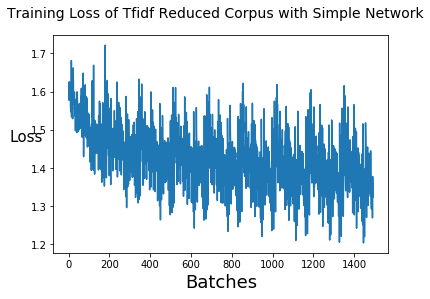

In [211]:
fig = plt.figure()

fig.suptitle('Training Loss of Tfidf Reduced Corpus with Simple Network', fontsize=14)
plt.xlabel('Batches', fontsize=18)
plt.ylabel('Loss', fontsize=15,rotation=0)

plt.plot(losses)

plt.show()

In [206]:
epochs = 100
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []
    
    progress_bar = tqdm(total=len(train_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))
    
    model2.train()
    
    for x, y in train_loader:

        x = x.to(device)
        y = y.to(device)
        optimizer2.zero_grad()
        
        pred = model2(x)
        
        loss = criterion2(pred, y)
        
        loss.backward()
        
        optimizer2.step()
        
        train_losses.append(loss.item())
        losses.append(loss.item())
        
        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    
    model2.eval()
    
    for x, y in validation_loader:
        
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():

            pred = model2(x)

            pred = pred.cpu()
            y = y.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion2(pred, y)

            test_losses.append(loss.item())
        
    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)
    
    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))
        
    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break









Epoch 1:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 1:   0%|                                                              | 0/10623 [00:01<?, ?it/s, train_loss=1.61]







Epoch 1:   1%|▎                                                    | 64/10623 [00:01<02:51, 61.62it/s, train_loss=1.61]







Epoch 1:   1%|▎                                                    | 64/10623 [00:01<02:51, 61.62it/s, train_loss=1.61]







Epoch 1:   1%|▋                                                    | 128/10623 [00:01<02:50, 61.62it/s, train_loss=1.6]







Epoch 1:   2%|▉                                                    | 192/10623 [00:01<02:01, 85.59it/s, train_loss=1.6]







Epoch 1:   2%|▉                                                   | 192/10623 [00:01<02:01, 85.59it/s, train_loss=1.61]







Epoch 1:   2%|█▎                                                  | 256/10623 [00:01<02:01, 85.59it/s, 

Epoch 1:  51%|█████████████████████████▌                        | 5440/10623 [00:05<00:04, 1140.89it/s, train_loss=1.5]







Epoch 1:  51%|█████████████████████████▌                        | 5440/10623 [00:05<00:04, 1140.89it/s, train_loss=1.5]







Epoch 1:  52%|█████████████████████████▉                        | 5504/10623 [00:05<00:04, 1140.89it/s, train_loss=1.5]







Epoch 1:  52%|██████████████████████████▏                       | 5568/10623 [00:05<00:04, 1138.36it/s, train_loss=1.5]







Epoch 1:  52%|██████████████████████████▏                       | 5568/10623 [00:05<00:04, 1138.36it/s, train_loss=1.5]







Epoch 1:  53%|█████████████████████████▉                       | 5632/10623 [00:06<00:04, 1138.36it/s, train_loss=1.49]







Epoch 1:  54%|██████████████████████████▎                      | 5696/10623 [00:06<00:04, 1155.06it/s, train_loss=1.49]







Epoch 1:  54%|██████████████████████████▎                      | 5696/10623 [00:06<00:04, 1155.06it/s, train_lo


Losses: train - 1.322, test - 1.005
F1 test - 0.525










Epoch 2:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 2:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.32]







Epoch 2:   1%|▎                                                   | 64/10623 [00:00<00:17, 587.03it/s, train_loss=1.32]







Epoch 2:   1%|▌                                                 | 128/10623 [00:00<00:09, 1163.38it/s, train_loss=1.32]







Epoch 2:   1%|▌                                                 | 128/10623 [00:00<00:09, 1163.38it/s, train_loss=1.32]







Epoch 2:   2%|▉                                                 | 192/10623 [00:00<00:08, 1163.38it/s, train_loss=1.32]







Epoch 2:   2%|█▏                                                | 256/10623 [00:00<00:08, 1160.22it/s, train_loss=1.32]







Epoch 2:   2%|█▏                                                | 256/10623 [00:00<00:08, 1160.22it/s, 

Epoch 2:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1130.24it/s, train_loss=1.19]







Epoch 2:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1139.98it/s, train_loss=1.19]







Epoch 2:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1139.98it/s, train_loss=1.18]







Epoch 2:  52%|█████████████████████████▋                       | 5568/10623 [00:04<00:04, 1139.98it/s, train_loss=1.18]







Epoch 2:  53%|█████████████████████████▉                       | 5632/10623 [00:04<00:04, 1156.23it/s, train_loss=1.18]







Epoch 2:  53%|█████████████████████████▉                       | 5632/10623 [00:05<00:04, 1156.23it/s, train_loss=1.18]







Epoch 2:  54%|██████████████████████████▎                      | 5696/10623 [00:05<00:04, 1156.23it/s, train_loss=1.18]







Epoch 2:  54%|██████████████████████████▌                      | 5760/10623 [00:05<00:04, 1161.52it/s, train_lo


Losses: train - 0.848, test - 0.749
F1 test - 0.688










Epoch 3:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 3:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.08]







Epoch 3:   1%|▎                                                   | 64/10623 [00:00<00:18, 566.25it/s, train_loss=1.08]







Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:09, 1122.56it/s, train_loss=1.08]







Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:09, 1122.56it/s, train_loss=1.08]







Epoch 3:   2%|▉                                                 | 192/10623 [00:00<00:09, 1122.56it/s, train_loss=1.08]







Epoch 3:   2%|█▏                                                | 256/10623 [00:00<00:09, 1088.20it/s, train_loss=1.08]







Epoch 3:   2%|█▏                                                | 256/10623 [00:00<00:09, 1088.20it/s, 

Epoch 3:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1137.67it/s, train_loss=0.998]







Epoch 3:  52%|████████████████████████▊                       | 5504/10623 [00:04<00:04, 1139.14it/s, train_loss=0.998]







Epoch 3:  52%|████████████████████████▊                       | 5504/10623 [00:04<00:04, 1139.14it/s, train_loss=0.997]







Epoch 3:  52%|█████████████████████████▏                      | 5568/10623 [00:04<00:04, 1139.14it/s, train_loss=0.996]







Epoch 3:  53%|█████████████████████████▍                      | 5632/10623 [00:04<00:04, 1143.24it/s, train_loss=0.996]







Epoch 3:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1143.24it/s, train_loss=0.995]







Epoch 3:  54%|█████████████████████████▋                      | 5696/10623 [00:05<00:04, 1143.24it/s, train_loss=0.994]







Epoch 3:  54%|██████████████████████████                      | 5760/10623 [00:05<00:04, 1155.43it/s, train_los


Losses: train - 0.606, test - 0.594
F1 test - 0.792










Epoch 4:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 4:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.925]







Epoch 4:   1%|▎                                                  | 64/10623 [00:00<00:18, 571.30it/s, train_loss=0.924]







Epoch 4:   1%|▌                                                | 128/10623 [00:00<00:09, 1132.50it/s, train_loss=0.924]







Epoch 4:   1%|▌                                                | 128/10623 [00:00<00:09, 1132.50it/s, train_loss=0.922]







Epoch 4:   2%|▉                                                 | 192/10623 [00:00<00:09, 1132.50it/s, train_loss=0.92]







Epoch 4:   2%|█▏                                                | 256/10623 [00:00<00:09, 1132.50it/s, train_loss=0.92]







Epoch 4:   2%|█▏                                               | 256/10623 [00:00<00:09, 1132.50it/s, t

Epoch 4:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1098.49it/s, train_loss=0.749]







Epoch 4:  52%|████████████████████████▊                       | 5504/10623 [00:04<00:04, 1111.37it/s, train_loss=0.749]







Epoch 4:  52%|████████████████████████▊                       | 5504/10623 [00:04<00:04, 1111.37it/s, train_loss=0.747]







Epoch 4:  52%|█████████████████████████▏                      | 5568/10623 [00:05<00:04, 1111.37it/s, train_loss=0.745]







Epoch 4:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1117.62it/s, train_loss=0.745]







Epoch 4:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1117.62it/s, train_loss=0.744]







Epoch 4:  54%|█████████████████████████▋                      | 5696/10623 [00:05<00:04, 1117.62it/s, train_loss=0.742]







Epoch 4:  54%|██████████████████████████                      | 5760/10623 [00:05<00:04, 1101.76it/s, train_los


Losses: train - 0.437, test - 0.503
F1 test - 0.820










Epoch 5:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 5:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.631]







Epoch 5:   1%|▎                                                  | 64/10623 [00:00<00:17, 592.47it/s, train_loss=0.629]







Epoch 5:   1%|▌                                                | 128/10623 [00:00<00:08, 1174.07it/s, train_loss=0.629]







Epoch 5:   1%|▌                                                | 128/10623 [00:00<00:08, 1174.07it/s, train_loss=0.629]







Epoch 5:   2%|▉                                                | 192/10623 [00:00<00:08, 1174.07it/s, train_loss=0.627]







Epoch 5:   2%|█▏                                               | 256/10623 [00:00<00:08, 1167.63it/s, train_loss=0.627]







Epoch 5:   2%|█▏                                               | 256/10623 [00:00<00:08, 1167.63it/s, t

Epoch 5:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1144.02it/s, train_loss=0.535]







Epoch 5:  52%|████████████████████████▊                       | 5504/10623 [00:04<00:04, 1156.00it/s, train_loss=0.535]







Epoch 5:  52%|████████████████████████▊                       | 5504/10623 [00:04<00:04, 1156.00it/s, train_loss=0.535]







Epoch 5:  52%|█████████████████████████▏                      | 5568/10623 [00:04<00:04, 1156.00it/s, train_loss=0.534]







Epoch 5:  53%|█████████████████████████▍                      | 5632/10623 [00:04<00:04, 1115.79it/s, train_loss=0.534]







Epoch 5:  53%|█████████████████████████▍                      | 5632/10623 [00:04<00:04, 1115.79it/s, train_loss=0.533]







Epoch 5:  54%|█████████████████████████▋                      | 5696/10623 [00:05<00:04, 1115.79it/s, train_loss=0.532]







Epoch 5:  54%|██████████████████████████                      | 5760/10623 [00:05<00:04, 1100.51it/s, train_los


Losses: train - 0.339, test - 0.476
F1 test - 0.847










Epoch 6:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 6:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.461]







Epoch 6:   1%|▎                                                   | 64/10623 [00:00<00:17, 587.03it/s, train_loss=0.46]







Epoch 6:   1%|▌                                                 | 128/10623 [00:00<00:09, 1163.39it/s, train_loss=0.46]







Epoch 6:   1%|▌                                                 | 128/10623 [00:00<00:09, 1163.39it/s, train_loss=0.46]







Epoch 6:   2%|▉                                                | 192/10623 [00:00<00:08, 1163.39it/s, train_loss=0.459]







Epoch 6:   2%|█▏                                               | 256/10623 [00:00<00:09, 1147.73it/s, train_loss=0.459]







Epoch 6:   2%|█▏                                               | 256/10623 [00:00<00:09, 1147.73it/s, t

Epoch 6:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1160.34it/s, train_loss=0.397]







Epoch 6:  52%|████████████████████████▊                       | 5504/10623 [00:04<00:04, 1161.25it/s, train_loss=0.397]







Epoch 6:  52%|████████████████████████▊                       | 5504/10623 [00:05<00:04, 1161.25it/s, train_loss=0.397]







Epoch 6:  52%|█████████████████████████▏                      | 5568/10623 [00:05<00:04, 1161.25it/s, train_loss=0.396]







Epoch 6:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1161.89it/s, train_loss=0.396]







Epoch 6:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1161.89it/s, train_loss=0.396]







Epoch 6:  54%|█████████████████████████▋                      | 5696/10623 [00:05<00:04, 1161.89it/s, train_loss=0.395]







Epoch 6:  54%|██████████████████████████                      | 5760/10623 [00:05<00:04, 1079.94it/s, train_los


Losses: train - 0.278, test - 0.472
F1 test - 0.851










Epoch 7:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 7:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.351]







Epoch 7:   1%|▎                                                  | 64/10623 [00:00<00:17, 587.03it/s, train_loss=0.351]







Epoch 7:   1%|▌                                                | 128/10623 [00:00<00:09, 1163.37it/s, train_loss=0.351]







Epoch 7:   1%|▌                                                | 128/10623 [00:00<00:09, 1163.37it/s, train_loss=0.351]







Epoch 7:   2%|▉                                                 | 192/10623 [00:00<00:08, 1163.37it/s, train_loss=0.35]







Epoch 7:   2%|█▏                                                | 256/10623 [00:00<00:08, 1157.07it/s, train_loss=0.35]







Epoch 7:   2%|█▏                                                | 256/10623 [00:00<00:08, 1157.07it/s, 

Epoch 7:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1134.80it/s, train_loss=0.31]







Epoch 7:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1143.23it/s, train_loss=0.31]







Epoch 7:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1143.23it/s, train_loss=0.31]







Epoch 7:  52%|█████████████████████████▋                       | 5568/10623 [00:05<00:04, 1143.23it/s, train_loss=0.31]







Epoch 7:  53%|█████████████████████████▉                       | 5632/10623 [00:05<00:04, 1133.93it/s, train_loss=0.31]







Epoch 7:  53%|█████████████████████████▉                       | 5632/10623 [00:05<00:04, 1133.93it/s, train_loss=0.31]







Epoch 7:  54%|█████████████████████████▋                      | 5696/10623 [00:05<00:04, 1133.93it/s, train_loss=0.309]







Epoch 7:  54%|██████████████████████████                      | 5760/10623 [00:05<00:04, 1139.55it/s, train_los


Losses: train - 0.225, test - 0.494
F1 test - 0.865
Early stopping


F1 no reduce attention: 0.865

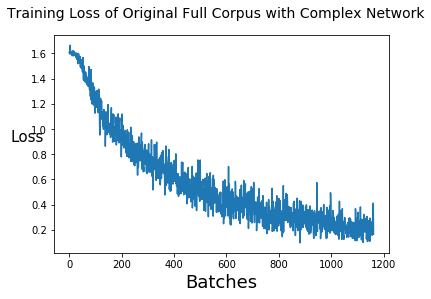

In [207]:
fig = plt.figure()

fig.suptitle('Training Loss of Original Full Corpus with Complex Network', fontsize=14)
plt.xlabel('Batches', fontsize=18)
plt.ylabel('Loss', fontsize=15,rotation=0)

plt.plot(losses)

plt.show()

In [212]:
epochs = 100
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []
    
    progress_bar = tqdm(total=len(train_loader_reduced.dataset), desc='Epoch {}'.format(n_epoch + 1))
    
    model2_reduced.train()
    
    for x, y in train_loader_reduced:

        x = x.to(device)
        y = y.to(device)
        optimizer2_reduced.zero_grad()
        
        pred = model2_reduced(x)
        
        loss = criterion2_reduced(pred, y)
        
        loss.backward()
        
        optimizer2_reduced.step()
        
        train_losses.append(loss.item())
        losses.append(loss.item())
        
        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    
    model2_reduced.eval()
    
    for x, y in validation_loader_reduced:
        
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():

            pred = model2_reduced(x)

            pred = pred.cpu()
            y = y.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion2_reduced(pred, y)

            test_losses.append(loss.item())
        
    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)
    
    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))
        
    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break









Epoch 1:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 1:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.62]







Epoch 1:   1%|▎                                                   | 64/10623 [00:00<00:27, 390.16it/s, train_loss=1.62]







Epoch 1:   1%|▌                                                  | 128/10623 [00:00<00:13, 780.32it/s, train_loss=1.62]







Epoch 1:   1%|▌                                                  | 128/10623 [00:00<00:13, 780.32it/s, train_loss=1.62]







Epoch 1:   2%|▉                                                  | 192/10623 [00:00<00:13, 780.32it/s, train_loss=1.62]







Epoch 1:   2%|█▏                                                 | 256/10623 [00:00<00:12, 836.97it/s, train_loss=1.62]







Epoch 1:   2%|█▏                                                 | 256/10623 [00:00<00:12, 836.97it/s, 

Epoch 1:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1129.04it/s, train_loss=1.57]







Epoch 1:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1139.13it/s, train_loss=1.57]







Epoch 1:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1139.13it/s, train_loss=1.57]







Epoch 1:  52%|█████████████████████████▋                       | 5568/10623 [00:05<00:04, 1139.13it/s, train_loss=1.57]







Epoch 1:  53%|█████████████████████████▉                       | 5632/10623 [00:05<00:04, 1137.13it/s, train_loss=1.57]







Epoch 1:  53%|█████████████████████████▉                       | 5632/10623 [00:05<00:04, 1137.13it/s, train_loss=1.57]







Epoch 1:  54%|██████████████████████████▎                      | 5696/10623 [00:05<00:04, 1137.13it/s, train_loss=1.57]







Epoch 1:  54%|██████████████████████████▌                      | 5760/10623 [00:05<00:04, 1132.72it/s, train_lo


Losses: train - 1.438, test - 1.111
F1 test - 0.511










Epoch 2:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 2:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.44]







Epoch 2:   1%|▎                                                   | 64/10623 [00:00<00:18, 556.40it/s, train_loss=1.44]







Epoch 2:   1%|▌                                                 | 128/10623 [00:00<00:09, 1112.80it/s, train_loss=1.44]







Epoch 2:   1%|▌                                                 | 128/10623 [00:00<00:09, 1112.80it/s, train_loss=1.43]







Epoch 2:   2%|▉                                                 | 192/10623 [00:00<00:09, 1112.80it/s, train_loss=1.43]







Epoch 2:   2%|█▏                                                | 256/10623 [00:00<00:09, 1121.58it/s, train_loss=1.43]







Epoch 2:   2%|█▏                                                | 256/10623 [00:00<00:09, 1121.58it/s, 

Epoch 2:  51%|█████████████████████████                        | 5440/10623 [00:05<00:04, 1118.62it/s, train_loss=1.33]







Epoch 2:  52%|█████████████████████████▍                       | 5504/10623 [00:05<00:04, 1119.80it/s, train_loss=1.33]







Epoch 2:  52%|█████████████████████████▍                       | 5504/10623 [00:05<00:04, 1119.80it/s, train_loss=1.33]







Epoch 2:  52%|█████████████████████████▋                       | 5568/10623 [00:05<00:04, 1119.80it/s, train_loss=1.32]







Epoch 2:  53%|█████████████████████████▉                       | 5632/10623 [00:05<00:04, 1123.58it/s, train_loss=1.32]







Epoch 2:  53%|█████████████████████████▉                       | 5632/10623 [00:05<00:04, 1123.58it/s, train_loss=1.32]







Epoch 2:  54%|██████████████████████████▎                      | 5696/10623 [00:05<00:04, 1123.58it/s, train_loss=1.32]







Epoch 2:  54%|██████████████████████████▌                      | 5760/10623 [00:05<00:04, 1132.22it/s, train_lo


Losses: train - 1.067, test - 0.968
F1 test - 0.592










Epoch 3:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 3:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.25]







Epoch 3:   1%|▎                                                   | 64/10623 [00:00<00:19, 551.60it/s, train_loss=1.25]







Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:09, 1103.21it/s, train_loss=1.25]







Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:09, 1103.21it/s, train_loss=1.25]







Epoch 3:   2%|▉                                                 | 192/10623 [00:00<00:09, 1103.21it/s, train_loss=1.25]







Epoch 3:   2%|█▏                                                | 256/10623 [00:00<00:09, 1108.94it/s, train_loss=1.25]







Epoch 3:   2%|█▏                                                | 256/10623 [00:00<00:09, 1108.94it/s, 

Epoch 3:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1132.40it/s, train_loss=1.19]







Epoch 3:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1132.43it/s, train_loss=1.19]







Epoch 3:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1132.43it/s, train_loss=1.19]







Epoch 3:  52%|█████████████████████████▋                       | 5568/10623 [00:05<00:04, 1132.43it/s, train_loss=1.19]







Epoch 3:  53%|█████████████████████████▉                       | 5632/10623 [00:05<00:04, 1132.45it/s, train_loss=1.19]







Epoch 3:  53%|█████████████████████████▉                       | 5632/10623 [00:05<00:04, 1132.45it/s, train_loss=1.19]







Epoch 3:  54%|██████████████████████████▎                      | 5696/10623 [00:05<00:04, 1132.45it/s, train_loss=1.19]







Epoch 3:  54%|██████████████████████████▌                      | 5760/10623 [00:05<00:04, 1094.68it/s, train_lo


Losses: train - 0.926, test - 0.896
F1 test - 0.648










Epoch 4:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 4:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.14]







Epoch 4:   1%|▎                                                   | 64/10623 [00:00<00:17, 598.00it/s, train_loss=1.14]







Epoch 4:   1%|▌                                                 | 128/10623 [00:00<00:08, 1184.94it/s, train_loss=1.14]







Epoch 4:   1%|▌                                                 | 128/10623 [00:00<00:08, 1184.94it/s, train_loss=1.14]







Epoch 4:   2%|▉                                                 | 192/10623 [00:00<00:08, 1184.94it/s, train_loss=1.14]







Epoch 4:   2%|█▏                                                | 256/10623 [00:00<00:08, 1175.14it/s, train_loss=1.14]







Epoch 4:   2%|█▏                                                | 256/10623 [00:00<00:08, 1175.14it/s, 

Epoch 4:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1150.57it/s, train_loss=1.02]







Epoch 4:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1145.09it/s, train_loss=1.02]







Epoch 4:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1145.09it/s, train_loss=1.02]







Epoch 4:  52%|█████████████████████████▋                       | 5568/10623 [00:04<00:04, 1145.09it/s, train_loss=1.02]







Epoch 4:  53%|█████████████████████████▉                       | 5632/10623 [00:04<00:04, 1141.28it/s, train_loss=1.02]







Epoch 4:  53%|█████████████████████████▉                       | 5632/10623 [00:05<00:04, 1141.28it/s, train_loss=1.02]







Epoch 4:  54%|██████████████████████████▎                      | 5696/10623 [00:05<00:04, 1141.28it/s, train_loss=1.01]







Epoch 4:  54%|██████████████████████████▌                      | 5760/10623 [00:05<00:04, 1144.74it/s, train_lo


Losses: train - 0.812, test - 0.817
F1 test - 0.681










Epoch 5:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 5:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.935]







Epoch 5:   1%|▎                                                  | 64/10623 [00:00<00:20, 516.02it/s, train_loss=0.934]







Epoch 5:   1%|▌                                                | 128/10623 [00:00<00:10, 1032.03it/s, train_loss=0.934]







Epoch 5:   1%|▌                                                | 128/10623 [00:00<00:10, 1032.03it/s, train_loss=0.934]







Epoch 5:   2%|▉                                                | 192/10623 [00:00<00:10, 1032.03it/s, train_loss=0.933]







Epoch 5:   2%|█▏                                               | 256/10623 [00:00<00:09, 1068.22it/s, train_loss=0.933]







Epoch 5:   2%|█▏                                               | 256/10623 [00:00<00:09, 1068.22it/s, t

Epoch 5:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1148.69it/s, train_loss=0.871]







Epoch 5:  52%|████████████████████████▊                       | 5504/10623 [00:04<00:04, 1143.78it/s, train_loss=0.871]







Epoch 5:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1143.78it/s, train_loss=0.87]







Epoch 5:  52%|█████████████████████████▏                      | 5568/10623 [00:04<00:04, 1143.78it/s, train_loss=0.869]







Epoch 5:  53%|█████████████████████████▍                      | 5632/10623 [00:04<00:04, 1074.32it/s, train_loss=0.869]







Epoch 5:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1074.32it/s, train_loss=0.868]







Epoch 5:  54%|█████████████████████████▋                      | 5696/10623 [00:05<00:04, 1074.32it/s, train_loss=0.868]







Epoch 5:  54%|██████████████████████████                      | 5760/10623 [00:05<00:04, 1069.25it/s, train_los


Losses: train - 0.702, test - 0.774
F1 test - 0.725










Epoch 6:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 6:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.813]







Epoch 6:   1%|▎                                                  | 64/10623 [00:00<00:18, 556.40it/s, train_loss=0.813]







Epoch 6:   1%|▌                                                | 128/10623 [00:00<00:09, 1103.21it/s, train_loss=0.813]







Epoch 6:   1%|▌                                                | 128/10623 [00:00<00:09, 1103.21it/s, train_loss=0.812]







Epoch 6:   2%|▉                                                | 192/10623 [00:00<00:09, 1103.21it/s, train_loss=0.812]







Epoch 6:   2%|█▏                                               | 256/10623 [00:00<00:09, 1083.59it/s, train_loss=0.812]







Epoch 6:   2%|█▏                                               | 256/10623 [00:00<00:09, 1083.59it/s, t

Epoch 6:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1134.92it/s, train_loss=0.755]







Epoch 6:  52%|████████████████████████▊                       | 5504/10623 [00:04<00:04, 1134.19it/s, train_loss=0.755]







Epoch 6:  52%|████████████████████████▊                       | 5504/10623 [00:05<00:04, 1134.19it/s, train_loss=0.754]







Epoch 6:  52%|█████████████████████████▏                      | 5568/10623 [00:05<00:04, 1134.19it/s, train_loss=0.754]







Epoch 6:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1104.33it/s, train_loss=0.754]







Epoch 6:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1104.33it/s, train_loss=0.753]







Epoch 6:  54%|█████████████████████████▋                      | 5696/10623 [00:05<00:04, 1104.33it/s, train_loss=0.752]







Epoch 6:  54%|██████████████████████████                      | 5760/10623 [00:05<00:04, 1068.06it/s, train_los


Losses: train - 0.595, test - 0.710
F1 test - 0.769










Epoch 7:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 7:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.703]







Epoch 7:   1%|▎                                                  | 64/10623 [00:00<00:18, 561.28it/s, train_loss=0.702]







Epoch 7:   1%|▌                                                | 128/10623 [00:00<00:09, 1112.80it/s, train_loss=0.702]







Epoch 7:   1%|▌                                                | 128/10623 [00:00<00:09, 1112.80it/s, train_loss=0.702]







Epoch 7:   2%|▉                                                | 192/10623 [00:00<00:09, 1112.80it/s, train_loss=0.701]







Epoch 7:   2%|█▏                                               | 256/10623 [00:00<00:09, 1118.64it/s, train_loss=0.701]







Epoch 7:   2%|█▏                                               | 256/10623 [00:00<00:09, 1118.64it/s, t

Epoch 7:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1138.63it/s, train_loss=0.651]







Epoch 7:  52%|████████████████████████▊                       | 5504/10623 [00:04<00:04, 1136.79it/s, train_loss=0.651]







Epoch 7:  52%|████████████████████████▊                       | 5504/10623 [00:04<00:04, 1136.79it/s, train_loss=0.651]







Epoch 7:  52%|█████████████████████████▏                      | 5568/10623 [00:05<00:04, 1136.79it/s, train_loss=0.651]







Epoch 7:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1141.57it/s, train_loss=0.651]







Epoch 7:  53%|█████████████████████████▉                       | 5632/10623 [00:05<00:04, 1141.57it/s, train_loss=0.65]







Epoch 7:  54%|██████████████████████████▎                      | 5696/10623 [00:05<00:04, 1141.57it/s, train_loss=0.65]







Epoch 7:  54%|██████████████████████████▌                      | 5760/10623 [00:05<00:04, 1135.80it/s, train_lo


Losses: train - 0.519, test - 0.700
F1 test - 0.785










Epoch 8:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 8:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.605]







Epoch 8:   1%|▎                                                  | 64/10623 [00:00<00:18, 581.69it/s, train_loss=0.605]







Epoch 8:   1%|▌                                                | 128/10623 [00:00<00:09, 1163.39it/s, train_loss=0.605]







Epoch 8:   1%|▌                                                | 128/10623 [00:00<00:09, 1163.39it/s, train_loss=0.604]







Epoch 8:   2%|▉                                                | 192/10623 [00:00<00:08, 1163.39it/s, train_loss=0.604]







Epoch 8:   2%|█▏                                               | 256/10623 [00:00<00:08, 1157.07it/s, train_loss=0.604]







Epoch 8:   2%|█▏                                               | 256/10623 [00:00<00:08, 1157.07it/s, t

Epoch 8:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1112.42it/s, train_loss=0.56]







Epoch 8:  52%|█████████████████████████▍                       | 5504/10623 [00:04<00:04, 1121.31it/s, train_loss=0.56]







Epoch 8:  52%|█████████████████████████▍                       | 5504/10623 [00:05<00:04, 1121.31it/s, train_loss=0.56]







Epoch 8:  52%|█████████████████████████▏                      | 5568/10623 [00:05<00:04, 1121.31it/s, train_loss=0.559]







Epoch 8:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1079.12it/s, train_loss=0.559]







Epoch 8:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1079.12it/s, train_loss=0.559]







Epoch 8:  54%|█████████████████████████▋                      | 5696/10623 [00:05<00:04, 1079.12it/s, train_loss=0.558]







Epoch 8:  54%|██████████████████████████                      | 5760/10623 [00:05<00:04, 1061.90it/s, train_los


Losses: train - 0.445, test - 0.697
F1 test - 0.777










Epoch 9:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]







Epoch 9:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.519]







Epoch 9:   1%|▎                                                  | 64/10623 [00:00<00:19, 546.89it/s, train_loss=0.519]







Epoch 9:   1%|▌                                                | 128/10623 [00:00<00:09, 1093.78it/s, train_loss=0.519]







Epoch 9:   1%|▌                                                | 128/10623 [00:00<00:09, 1093.78it/s, train_loss=0.518]







Epoch 9:   2%|▉                                                | 192/10623 [00:00<00:09, 1093.78it/s, train_loss=0.518]







Epoch 9:   2%|█▏                                               | 256/10623 [00:00<00:09, 1113.77it/s, train_loss=0.518]







Epoch 9:   2%|█▏                                               | 256/10623 [00:00<00:09, 1113.77it/s, t

Epoch 9:  51%|████████████████████████▌                       | 5440/10623 [00:05<00:04, 1118.36it/s, train_loss=0.484]







Epoch 9:  52%|████████████████████████▊                       | 5504/10623 [00:05<00:04, 1128.50it/s, train_loss=0.484]







Epoch 9:  52%|████████████████████████▊                       | 5504/10623 [00:05<00:04, 1128.50it/s, train_loss=0.483]







Epoch 9:  52%|█████████████████████████▏                      | 5568/10623 [00:05<00:04, 1128.50it/s, train_loss=0.483]







Epoch 9:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1135.71it/s, train_loss=0.483]







Epoch 9:  53%|█████████████████████████▍                      | 5632/10623 [00:05<00:04, 1135.71it/s, train_loss=0.482]







Epoch 9:  54%|█████████████████████████▋                      | 5696/10623 [00:05<00:04, 1135.71it/s, train_loss=0.482]







Epoch 9:  54%|██████████████████████████                      | 5760/10623 [00:05<00:04, 1116.92it/s, train_los


Losses: train - 0.396, test - 0.717
F1 test - 0.786
Early stopping


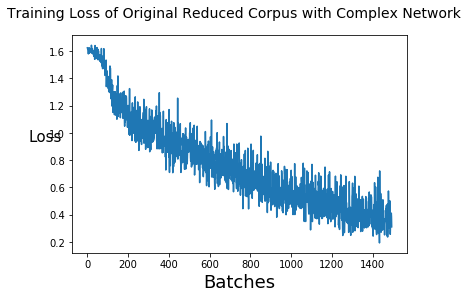

In [213]:
fig = plt.figure()

fig.suptitle('Training Loss of Original Reduced Corpus with Complex Network', fontsize=14)
plt.xlabel('Batches', fontsize=18)
plt.ylabel('Loss', fontsize=15,rotation=0)

plt.plot(losses)

plt.show()

In [253]:
import torch.optim as optim
import torch.nn as nn

epochs = 100
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []
    
    progress_bar = tqdm(total=len(train_loader_tfidf.dataset), desc='Epoch {}'.format(n_epoch + 1))
    
    model2_tfidf.train()
    
    for x, y in train_loader_tfidf:

        x = x.to(device)
        y = y.to(device)
        optimizer2_tfidf.zero_grad()
        
        pred = model2_tfidf(x)
        
        loss = criterion2_tfidf(pred, y)
        
        loss.backward()
        
        optimizer2_tfidf.step()
        
        train_losses.append(loss.item())
        losses.append(loss.item())
        
        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    
    model2_tfidf.eval()
    
    for x, y in validation_loader_tfidf:
        
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():

            pred = model2_tfidf(x)

            pred = pred.cpu()
            y = y.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion2_tfidf(pred, y)

            test_losses.append(loss.item())
        
    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)
    
    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))
        
    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break
















Epoch 1:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 1:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.62]














Epoch 1:   1%|▎                                                   | 64/10623 [00:00<00:26, 404.97it/s, train_loss=1.64]














Epoch 1:   1%|▌                                                  | 128/10623 [00:00<00:13, 804.85it/s, train_loss=1.64]














Epoch 1:   1%|▌                                                  | 128/10623 [00:00<00:13, 804.85it/s, train_loss=1.63]














Epoch 1:   2%|▉                                                  | 192/10623 [00:00<00:12, 804.85it/s, train_loss=1.63]














Epoch 1:   2%|█▏                                                 | 256/10623 [00:00<00:12, 861.76it/s, train_loss=1.63]














Epoch 1:   2%|█▏                               

Epoch 1:  49%|████████████████████████▍                         | 5184/10623 [00:04<00:04, 1168.03it/s, train_loss=1.6]














Epoch 1:  49%|████████████████████████▋                         | 5248/10623 [00:04<00:04, 1163.45it/s, train_loss=1.6]














Epoch 1:  49%|████████████████████████▋                         | 5248/10623 [00:04<00:04, 1163.45it/s, train_loss=1.6]














Epoch 1:  50%|█████████████████████████                         | 5312/10623 [00:04<00:04, 1163.45it/s, train_loss=1.6]














Epoch 1:  51%|█████████████████████████▎                        | 5376/10623 [00:04<00:04, 1166.62it/s, train_loss=1.6]














Epoch 1:  51%|█████████████████████████▎                        | 5376/10623 [00:04<00:04, 1166.62it/s, train_loss=1.6]














Epoch 1:  51%|█████████████████████████▌                        | 5440/10623 [00:04<00:04, 1166.62it/s, train_loss=1.6]














Epoch 1:  52%|█████████████████████████▉                      

Epoch 1:  98%|███████████████████████████████████████████████▊ | 10368/10623 [00:09<00:00, 1151.27it/s, train_loss=1.5]














Epoch 1:  98%|████████████████████████████████████████████████ | 10432/10623 [00:09<00:00, 1151.27it/s, train_loss=1.5]














Epoch 1:  99%|████████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1158.01it/s, train_loss=1.5]














Epoch 1:  99%|████████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1158.01it/s, train_loss=1.5]














Epoch 1:  99%|████████████████████████████████████████████████▋| 10560/10623 [00:09<00:00, 1158.01it/s, train_loss=1.5]














Epoch 1: 100%|█████████████████████████████████████████████████| 10623/10623 [00:09<00:00, 1123.13it/s, train_loss=1.5]

















Losses: train - 1.500, test - 1.241
F1 test - 0.417

















Epoch 2:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 2:   0%|                                                               | 0/10623 [00:00<?, ?it/s, train_loss=1.5]














Epoch 2:   1%|▎                                                    | 64/10623 [00:00<00:20, 511.89it/s, train_loss=1.5]














Epoch 2:   1%|▌                                                  | 128/10623 [00:00<00:10, 1015.65it/s, train_loss=1.5]














Epoch 2:   1%|▌                                                 | 128/10623 [00:00<00:10, 1015.65it/s, train_loss=1.49]














Epoch 2:   2%|▉                                                 | 192/10623 [00:00<00:10, 1015.65it/s, train_loss=1.49]














Epoch 2:   2%|█▏                                                | 256/10623 [00:00<00:09, 1053.27it/s, train_loss=1.49]














Epoch 2:   2%|█▏                               

Epoch 2:  49%|███████████████████████▉                         | 5184/10623 [00:04<00:04, 1192.54it/s, train_loss=1.38]














Epoch 2:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1196.92it/s, train_loss=1.38]














Epoch 2:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1196.92it/s, train_loss=1.38]














Epoch 2:  50%|████████████████████████▌                        | 5312/10623 [00:04<00:04, 1196.92it/s, train_loss=1.38]














Epoch 2:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1173.60it/s, train_loss=1.38]














Epoch 2:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1173.60it/s, train_loss=1.38]














Epoch 2:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1173.60it/s, train_loss=1.38]














Epoch 2:  52%|█████████████████████████▍                      

Epoch 2:  98%|███████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1203.62it/s, train_loss=1.3]














Epoch 2:  98%|████████████████████████████████████████████████ | 10432/10623 [00:08<00:00, 1203.62it/s, train_loss=1.3]














Epoch 2:  99%|████████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1201.33it/s, train_loss=1.3]














Epoch 2:  99%|████████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1201.33it/s, train_loss=1.3]














Epoch 2:  99%|████████████████████████████████████████████████▋| 10560/10623 [00:09<00:00, 1201.33it/s, train_loss=1.3]














Epoch 2: 100%|█████████████████████████████████████████████████| 10623/10623 [00:09<00:00, 1196.89it/s, train_loss=1.3]

















Losses: train - 1.091, test - 1.046
F1 test - 0.496

















Epoch 3:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 3:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.29]














Epoch 3:   1%|▎                                                   | 64/10623 [00:00<00:17, 615.25it/s, train_loss=1.29]














Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:08, 1218.79it/s, train_loss=1.29]














Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:08, 1218.79it/s, train_loss=1.29]














Epoch 3:   2%|▉                                                 | 192/10623 [00:00<00:08, 1218.79it/s, train_loss=1.29]














Epoch 3:   2%|█▏                                                | 256/10623 [00:00<00:08, 1168.70it/s, train_loss=1.29]














Epoch 3:   2%|█▏                               

Epoch 3:  49%|███████████████████████▉                         | 5184/10623 [00:04<00:04, 1159.88it/s, train_loss=1.23]














Epoch 3:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1145.34it/s, train_loss=1.23]














Epoch 3:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1145.34it/s, train_loss=1.23]














Epoch 3:  50%|████████████████████████▌                        | 5312/10623 [00:04<00:04, 1145.34it/s, train_loss=1.23]














Epoch 3:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1147.60it/s, train_loss=1.23]














Epoch 3:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1147.60it/s, train_loss=1.23]














Epoch 3:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1147.60it/s, train_loss=1.22]














Epoch 3:  52%|█████████████████████████▍                      

Epoch 3:  98%|██████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1183.14it/s, train_loss=1.17]














Epoch 3:  98%|███████████████████████████████████████████████▏| 10432/10623 [00:09<00:00, 1183.14it/s, train_loss=1.17]














Epoch 3:  99%|███████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1183.67it/s, train_loss=1.17]














Epoch 3:  99%|███████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1183.67it/s, train_loss=1.17]














Epoch 3:  99%|███████████████████████████████████████████████▋| 10560/10623 [00:09<00:00, 1183.67it/s, train_loss=1.17]














Epoch 3: 100%|████████████████████████████████████████████████| 10623/10623 [00:09<00:00, 1181.26it/s, train_loss=1.17]

















Losses: train - 0.919, test - 0.931
F1 test - 0.583

















Epoch 4:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 4:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.17]














Epoch 4:   1%|▎                                                   | 64/10623 [00:00<00:17, 603.64it/s, train_loss=1.17]














Epoch 4:   1%|▌                                                 | 128/10623 [00:00<00:08, 1207.28it/s, train_loss=1.17]














Epoch 4:   1%|▌                                                 | 128/10623 [00:00<00:08, 1207.28it/s, train_loss=1.17]














Epoch 4:   2%|▉                                                 | 192/10623 [00:00<00:08, 1207.28it/s, train_loss=1.17]














Epoch 4:   2%|█▏                                                | 256/10623 [00:00<00:08, 1210.71it/s, train_loss=1.17]














Epoch 4:   2%|█▏                               

Epoch 4:  49%|███████████████████████▉                         | 5184/10623 [00:04<00:04, 1199.77it/s, train_loss=1.04]














Epoch 4:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1198.63it/s, train_loss=1.04]














Epoch 4:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1198.63it/s, train_loss=1.04]














Epoch 4:  50%|████████████████████████▌                        | 5312/10623 [00:04<00:04, 1198.63it/s, train_loss=1.04]














Epoch 4:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1208.02it/s, train_loss=1.04]














Epoch 4:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1208.02it/s, train_loss=1.04]














Epoch 4:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1208.02it/s, train_loss=1.04]














Epoch 4:  52%|█████████████████████████▍                      

Epoch 4:  98%|█████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1208.25it/s, train_loss=0.935]














Epoch 4:  98%|██████████████████████████████████████████████▏| 10432/10623 [00:08<00:00, 1208.25it/s, train_loss=0.934]














Epoch 4:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1194.43it/s, train_loss=0.934]














Epoch 4:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1194.43it/s, train_loss=0.934]














Epoch 4:  99%|██████████████████████████████████████████████▋| 10560/10623 [00:08<00:00, 1194.43it/s, train_loss=0.932]














Epoch 4: 100%|███████████████████████████████████████████████| 10623/10623 [00:08<00:00, 1195.45it/s, train_loss=0.932]

















Losses: train - 0.783, test - 0.825
F1 test - 0.638

















Epoch 5:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 5:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.931]














Epoch 5:   1%|▎                                                   | 64/10623 [00:00<00:17, 592.46it/s, train_loss=0.93]














Epoch 5:   1%|▌                                                 | 128/10623 [00:00<00:08, 1174.05it/s, train_loss=0.93]














Epoch 5:   1%|▌                                                | 128/10623 [00:00<00:08, 1174.05it/s, train_loss=0.929]














Epoch 5:   2%|▉                                                | 192/10623 [00:00<00:08, 1174.05it/s, train_loss=0.928]














Epoch 5:   2%|█▏                                               | 256/10623 [00:00<00:09, 1145.68it/s, train_loss=0.928]














Epoch 5:   2%|█▏                               

Epoch 5:  49%|███████████████████████▍                        | 5184/10623 [00:04<00:04, 1156.34it/s, train_loss=0.858]














Epoch 5:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1164.77it/s, train_loss=0.858]














Epoch 5:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1164.77it/s, train_loss=0.857]














Epoch 5:  50%|████████████████████████                        | 5312/10623 [00:04<00:04, 1164.77it/s, train_loss=0.856]














Epoch 5:  51%|████████████████████████▎                       | 5376/10623 [00:04<00:04, 1170.74it/s, train_loss=0.856]














Epoch 5:  51%|████████████████████████▎                       | 5376/10623 [00:04<00:04, 1170.74it/s, train_loss=0.855]














Epoch 5:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1170.74it/s, train_loss=0.854]














Epoch 5:  52%|████████████████████████▊                       

Epoch 5:  98%|█████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1167.77it/s, train_loss=0.793]














Epoch 5:  98%|██████████████████████████████████████████████▏| 10432/10623 [00:09<00:00, 1167.77it/s, train_loss=0.791]














Epoch 5:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1166.45it/s, train_loss=0.791]














Epoch 5:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1166.45it/s, train_loss=0.791]














Epoch 5:  99%|███████████████████████████████████████████████▋| 10560/10623 [00:09<00:00, 1166.45it/s, train_loss=0.79]














Epoch 5: 100%|████████████████████████████████████████████████| 10623/10623 [00:09<00:00, 1165.98it/s, train_loss=0.79]

















Losses: train - 0.663, test - 0.761
F1 test - 0.685

















Epoch 6:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 6:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.789]














Epoch 6:   1%|▎                                                  | 64/10623 [00:00<00:18, 561.28it/s, train_loss=0.788]














Epoch 6:   1%|▌                                                | 128/10623 [00:00<00:09, 1112.80it/s, train_loss=0.788]














Epoch 6:   1%|▌                                                | 128/10623 [00:00<00:09, 1112.80it/s, train_loss=0.787]














Epoch 6:   2%|▉                                                | 192/10623 [00:00<00:09, 1112.80it/s, train_loss=0.786]














Epoch 6:   2%|█▏                                               | 256/10623 [00:00<00:09, 1133.50it/s, train_loss=0.786]














Epoch 6:   2%|█▏                               

Epoch 6:  49%|███████████████████████▍                        | 5184/10623 [00:04<00:04, 1196.53it/s, train_loss=0.728]














Epoch 6:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1203.12it/s, train_loss=0.728]














Epoch 6:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1203.12it/s, train_loss=0.728]














Epoch 6:  50%|████████████████████████                        | 5312/10623 [00:04<00:04, 1203.12it/s, train_loss=0.727]














Epoch 6:  51%|████████████████████████▎                       | 5376/10623 [00:04<00:04, 1200.97it/s, train_loss=0.727]














Epoch 6:  51%|████████████████████████▎                       | 5376/10623 [00:04<00:04, 1200.97it/s, train_loss=0.726]














Epoch 6:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1200.97it/s, train_loss=0.725]














Epoch 6:  52%|████████████████████████▊                       

Epoch 6:  98%|█████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1186.47it/s, train_loss=0.672]














Epoch 6:  98%|██████████████████████████████████████████████▏| 10432/10623 [00:08<00:00, 1186.47it/s, train_loss=0.671]














Epoch 6:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1192.64it/s, train_loss=0.671]














Epoch 6:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1192.64it/s, train_loss=0.671]














Epoch 6:  99%|███████████████████████████████████████████████▋| 10560/10623 [00:09<00:00, 1192.64it/s, train_loss=0.67]














Epoch 6: 100%|████████████████████████████████████████████████| 10623/10623 [00:09<00:00, 1148.82it/s, train_loss=0.67]

















Losses: train - 0.562, test - 0.671
F1 test - 0.737

















Epoch 7:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 7:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=0.67]














Epoch 7:   1%|▎                                                  | 64/10623 [00:00<00:17, 592.46it/s, train_loss=0.669]














Epoch 7:   1%|▌                                                | 128/10623 [00:00<00:08, 1174.05it/s, train_loss=0.669]














Epoch 7:   1%|▌                                                | 128/10623 [00:00<00:08, 1174.05it/s, train_loss=0.669]














Epoch 7:   2%|▉                                                | 192/10623 [00:00<00:08, 1174.05it/s, train_loss=0.668]














Epoch 7:   2%|█▏                                               | 256/10623 [00:00<00:08, 1187.12it/s, train_loss=0.668]














Epoch 7:   2%|█▏                               

Epoch 7:  49%|███████████████████████▍                        | 5184/10623 [00:04<00:04, 1204.64it/s, train_loss=0.619]














Epoch 7:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1205.43it/s, train_loss=0.619]














Epoch 7:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1205.43it/s, train_loss=0.619]














Epoch 7:  50%|████████████████████████                        | 5312/10623 [00:04<00:04, 1205.43it/s, train_loss=0.618]














Epoch 7:  51%|████████████████████████▎                       | 5376/10623 [00:04<00:04, 1199.21it/s, train_loss=0.618]














Epoch 7:  51%|████████████████████████▎                       | 5376/10623 [00:04<00:04, 1199.21it/s, train_loss=0.618]














Epoch 7:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1199.21it/s, train_loss=0.617]














Epoch 7:  52%|████████████████████████▊                       

Epoch 7:  98%|█████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1210.57it/s, train_loss=0.572]














Epoch 7:  98%|██████████████████████████████████████████████▏| 10432/10623 [00:08<00:00, 1210.57it/s, train_loss=0.572]














Epoch 7:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1202.76it/s, train_loss=0.572]














Epoch 7:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1202.76it/s, train_loss=0.572]














Epoch 7:  99%|██████████████████████████████████████████████▋| 10560/10623 [00:08<00:00, 1202.76it/s, train_loss=0.572]














Epoch 7: 100%|███████████████████████████████████████████████| 10623/10623 [00:08<00:00, 1194.50it/s, train_loss=0.572]

















Losses: train - 0.486, test - 0.646
F1 test - 0.758

















Epoch 8:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 8:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=0.57]














Epoch 8:   1%|▎                                                  | 64/10623 [00:00<00:17, 598.00it/s, train_loss=0.571]














Epoch 8:   1%|▌                                                | 128/10623 [00:00<00:08, 1184.93it/s, train_loss=0.571]














Epoch 8:   1%|▌                                                 | 128/10623 [00:00<00:08, 1184.93it/s, train_loss=0.57]














Epoch 8:   2%|▉                                                | 192/10623 [00:00<00:08, 1184.93it/s, train_loss=0.569]














Epoch 8:   2%|█▏                                               | 256/10623 [00:00<00:08, 1184.93it/s, train_loss=0.569]














Epoch 8:   2%|█▏                               

Epoch 8:  49%|███████████████████████▍                        | 5184/10623 [00:04<00:04, 1196.06it/s, train_loss=0.531]














Epoch 8:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1186.06it/s, train_loss=0.531]














Epoch 8:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1186.06it/s, train_loss=0.531]














Epoch 8:  50%|████████████████████████▌                        | 5312/10623 [00:04<00:04, 1186.06it/s, train_loss=0.53]














Epoch 8:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1189.03it/s, train_loss=0.53]














Epoch 8:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1189.03it/s, train_loss=0.53]














Epoch 8:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1189.03it/s, train_loss=0.529]














Epoch 8:  52%|████████████████████████▊                       

Epoch 8:  98%|█████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1175.64it/s, train_loss=0.495]














Epoch 8:  98%|██████████████████████████████████████████████▏| 10432/10623 [00:08<00:00, 1175.64it/s, train_loss=0.494]














Epoch 8:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1181.67it/s, train_loss=0.494]














Epoch 8:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1181.67it/s, train_loss=0.494]














Epoch 8:  99%|██████████████████████████████████████████████▋| 10560/10623 [00:08<00:00, 1181.67it/s, train_loss=0.494]














Epoch 8: 100%|███████████████████████████████████████████████| 10623/10623 [00:08<00:00, 1183.17it/s, train_loss=0.494]

















Losses: train - 0.432, test - 0.677
F1 test - 0.738
Early stopping


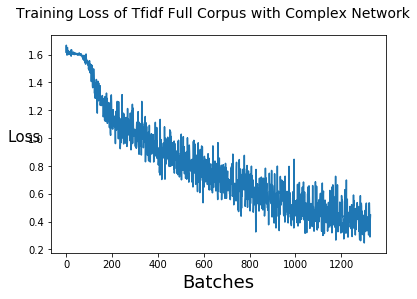

In [254]:
fig = plt.figure()

fig.suptitle('Training Loss of Tfidf Full Corpus with Complex Network', fontsize=14)
plt.xlabel('Batches', fontsize=18)
plt.ylabel('Loss', fontsize=15,rotation=0)

plt.plot(losses)

plt.show()

F1 no reduce F1: 0.577

In [259]:
import torch.optim as optim
import torch.nn as nn

epochs = 100
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []
    
    progress_bar = tqdm(total=len(train_loader_reduced_tfidf.dataset), desc='Epoch {}'.format(n_epoch + 1))
    
    model2_reduced_tfidf.train()
    
    for x, y in train_loader_reduced_tfidf:

        x = x.to(device)
        y = y.to(device)
        optimizer2_reduced_tfidf.zero_grad()
        
        pred = model2_reduced_tfidf(x)
        
        loss = criterion2_reduced_tfidf(pred, y)
        
        loss.backward()
        
        optimizer2_reduced_tfidf.step()
        
        train_losses.append(loss.item())
        losses.append(loss.item())
        
        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    
    model2_reduced_tfidf.eval()
    
    for x, y in validation_loader_reduced_tfidf:
        
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():

            pred = model2_reduced_tfidf(x)

            pred = pred.cpu()
            y = y.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion2_reduced_tfidf(pred, y)

            test_losses.append(loss.item())
        
    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)
    
    print()
    print('Losses: train - {:.3f}, test - {:.3f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.3f}'.format(f1))
        
    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break
















Epoch 1:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 1:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.61]














Epoch 1:   1%|▎                                                   | 64/10623 [00:00<00:21, 481.10it/s, train_loss=1.63]














Epoch 1:   1%|▌                                                  | 128/10623 [00:00<00:10, 955.01it/s, train_loss=1.63]














Epoch 1:   1%|▌                                                  | 128/10623 [00:00<00:10, 955.01it/s, train_loss=1.63]














Epoch 1:   2%|▉                                                  | 192/10623 [00:00<00:10, 955.01it/s, train_loss=1.62]














Epoch 1:   2%|█▏                                                 | 256/10623 [00:00<00:10, 983.64it/s, train_loss=1.62]














Epoch 1:   2%|█▏                               

Epoch 1:  49%|███████████████████████▉                         | 5184/10623 [00:04<00:04, 1152.61it/s, train_loss=1.61]














Epoch 1:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1168.49it/s, train_loss=1.61]














Epoch 1:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1168.49it/s, train_loss=1.61]














Epoch 1:  50%|████████████████████████▌                        | 5312/10623 [00:04<00:04, 1168.49it/s, train_loss=1.61]














Epoch 1:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1173.37it/s, train_loss=1.61]














Epoch 1:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1173.37it/s, train_loss=1.61]














Epoch 1:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1173.37it/s, train_loss=1.61]














Epoch 1:  52%|█████████████████████████▍                      

Epoch 1:  98%|██████████████████████████████████████████████▊ | 10368/10623 [00:09<00:00, 1162.91it/s, train_loss=1.56]














Epoch 1:  98%|███████████████████████████████████████████████▏| 10432/10623 [00:09<00:00, 1162.91it/s, train_loss=1.56]














Epoch 1:  99%|███████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1163.05it/s, train_loss=1.56]














Epoch 1:  99%|███████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1163.05it/s, train_loss=1.56]














Epoch 1:  99%|███████████████████████████████████████████████▋| 10560/10623 [00:09<00:00, 1163.05it/s, train_loss=1.56]














Epoch 1: 100%|████████████████████████████████████████████████| 10623/10623 [00:09<00:00, 1154.08it/s, train_loss=1.56]

















Losses: train - 1.555, test - 1.283
F1 test - 0.400

















Epoch 2:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 2:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.55]














Epoch 2:   1%|▎                                                   | 64/10623 [00:00<00:17, 587.03it/s, train_loss=1.55]














Epoch 2:   1%|▌                                                 | 128/10623 [00:00<00:09, 1163.39it/s, train_loss=1.55]














Epoch 2:   1%|▌                                                 | 128/10623 [00:00<00:09, 1163.39it/s, train_loss=1.55]














Epoch 2:   2%|▉                                                 | 192/10623 [00:00<00:08, 1163.39it/s, train_loss=1.55]














Epoch 2:   2%|█▏                                                | 256/10623 [00:00<00:08, 1176.22it/s, train_loss=1.55]














Epoch 2:   2%|█▏                               

Epoch 2:  49%|███████████████████████▉                         | 5184/10623 [00:04<00:04, 1141.79it/s, train_loss=1.44]














Epoch 2:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1145.10it/s, train_loss=1.44]














Epoch 2:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1145.10it/s, train_loss=1.44]














Epoch 2:  50%|████████████████████████▌                        | 5312/10623 [00:04<00:04, 1145.10it/s, train_loss=1.44]














Epoch 2:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1144.35it/s, train_loss=1.44]














Epoch 2:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1144.35it/s, train_loss=1.44]














Epoch 2:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1144.35it/s, train_loss=1.44]














Epoch 2:  52%|█████████████████████████▍                      

Epoch 2:  98%|██████████████████████████████████████████████▊ | 10368/10623 [00:09<00:00, 1167.34it/s, train_loss=1.37]














Epoch 2:  98%|███████████████████████████████████████████████▏| 10432/10623 [00:09<00:00, 1167.34it/s, train_loss=1.36]














Epoch 2:  99%|███████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1172.56it/s, train_loss=1.36]














Epoch 2:  99%|███████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1172.56it/s, train_loss=1.36]














Epoch 2:  99%|███████████████████████████████████████████████▋| 10560/10623 [00:09<00:00, 1172.56it/s, train_loss=1.36]














Epoch 2: 100%|████████████████████████████████████████████████| 10623/10623 [00:09<00:00, 1170.25it/s, train_loss=1.36]

















Losses: train - 1.170, test - 1.054
F1 test - 0.522

















Epoch 3:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 3:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.36]














Epoch 3:   1%|▎                                                   | 64/10623 [00:00<00:17, 603.64it/s, train_loss=1.36]














Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:08, 1196.00it/s, train_loss=1.36]














Epoch 3:   1%|▌                                                 | 128/10623 [00:00<00:08, 1196.00it/s, train_loss=1.36]














Epoch 3:   2%|▉                                                 | 192/10623 [00:00<00:08, 1196.00it/s, train_loss=1.36]














Epoch 3:   2%|█▏                                                | 256/10623 [00:00<00:08, 1199.37it/s, train_loss=1.36]














Epoch 3:   2%|█▏                               

Epoch 3:  49%|████████████████████████▍                         | 5184/10623 [00:04<00:04, 1201.81it/s, train_loss=1.3]














Epoch 3:  49%|████████████████████████▋                         | 5248/10623 [00:04<00:04, 1196.70it/s, train_loss=1.3]














Epoch 3:  49%|████████████████████████▋                         | 5248/10623 [00:04<00:04, 1196.70it/s, train_loss=1.3]














Epoch 3:  50%|█████████████████████████                         | 5312/10623 [00:04<00:04, 1196.70it/s, train_loss=1.3]














Epoch 3:  51%|█████████████████████████▎                        | 5376/10623 [00:04<00:04, 1199.85it/s, train_loss=1.3]














Epoch 3:  51%|█████████████████████████▎                        | 5376/10623 [00:04<00:04, 1199.85it/s, train_loss=1.3]














Epoch 3:  51%|█████████████████████████▌                        | 5440/10623 [00:04<00:04, 1199.85it/s, train_loss=1.3]














Epoch 3:  52%|█████████████████████████▉                      

Epoch 3:  98%|██████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1198.42it/s, train_loss=1.25]














Epoch 3:  98%|███████████████████████████████████████████████▏| 10432/10623 [00:08<00:00, 1198.42it/s, train_loss=1.25]














Epoch 3:  99%|███████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1201.07it/s, train_loss=1.25]














Epoch 3:  99%|███████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1201.07it/s, train_loss=1.25]














Epoch 3:  99%|███████████████████████████████████████████████▋| 10560/10623 [00:08<00:00, 1201.07it/s, train_loss=1.25]














Epoch 3: 100%|████████████████████████████████████████████████| 10623/10623 [00:08<00:00, 1186.64it/s, train_loss=1.25]

















Losses: train - 1.024, test - 0.999
F1 test - 0.561

















Epoch 4:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 4:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.25]














Epoch 4:   1%|▎                                                   | 64/10623 [00:00<00:17, 615.25it/s, train_loss=1.25]














Epoch 4:   1%|▌                                                 | 128/10623 [00:00<00:08, 1230.50it/s, train_loss=1.25]














Epoch 4:   1%|▌                                                 | 128/10623 [00:00<00:08, 1230.50it/s, train_loss=1.25]














Epoch 4:   2%|▉                                                 | 192/10623 [00:00<00:08, 1230.50it/s, train_loss=1.25]














Epoch 4:   2%|█▏                                                | 256/10623 [00:00<00:08, 1219.94it/s, train_loss=1.25]














Epoch 4:   2%|█▏                               

Epoch 4:  49%|███████████████████████▉                         | 5184/10623 [00:04<00:04, 1168.89it/s, train_loss=1.14]














Epoch 4:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1130.13it/s, train_loss=1.14]














Epoch 4:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1130.13it/s, train_loss=1.14]














Epoch 4:  50%|████████████████████████▌                        | 5312/10623 [00:04<00:04, 1130.13it/s, train_loss=1.14]














Epoch 4:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1142.96it/s, train_loss=1.14]














Epoch 4:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1142.96it/s, train_loss=1.14]














Epoch 4:  51%|█████████████████████████                        | 5440/10623 [00:04<00:04, 1142.96it/s, train_loss=1.14]














Epoch 4:  52%|█████████████████████████▍                      

Epoch 4:  98%|██████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1198.45it/s, train_loss=1.05]














Epoch 4:  98%|███████████████████████████████████████████████▏| 10432/10623 [00:08<00:00, 1198.45it/s, train_loss=1.05]














Epoch 4:  99%|███████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1191.03it/s, train_loss=1.05]














Epoch 4:  99%|███████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1191.03it/s, train_loss=1.05]














Epoch 4:  99%|███████████████████████████████████████████████▋| 10560/10623 [00:08<00:00, 1191.03it/s, train_loss=1.05]














Epoch 4: 100%|████████████████████████████████████████████████| 10623/10623 [00:08<00:00, 1189.71it/s, train_loss=1.05]

















Losses: train - 0.942, test - 0.975
F1 test - 0.573

















Epoch 5:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 5:   0%|                                                              | 0/10623 [00:00<?, ?it/s, train_loss=1.05]














Epoch 5:   1%|▎                                                   | 64/10623 [00:00<00:17, 603.64it/s, train_loss=1.05]














Epoch 5:   1%|▌                                                 | 128/10623 [00:00<00:08, 1196.00it/s, train_loss=1.05]














Epoch 5:   1%|▌                                                 | 128/10623 [00:00<00:08, 1196.00it/s, train_loss=1.04]














Epoch 5:   2%|▉                                                 | 192/10623 [00:00<00:08, 1196.00it/s, train_loss=1.04]














Epoch 5:   2%|█▏                                                | 256/10623 [00:00<00:09, 1120.60it/s, train_loss=1.04]














Epoch 5:   2%|█▏                               

Epoch 5:  49%|███████████████████████▍                        | 5184/10623 [00:04<00:04, 1193.56it/s, train_loss=0.992]














Epoch 5:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1190.96it/s, train_loss=0.992]














Epoch 5:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1190.96it/s, train_loss=0.991]














Epoch 5:  50%|████████████████████████▌                        | 5312/10623 [00:04<00:04, 1190.96it/s, train_loss=0.99]














Epoch 5:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1195.81it/s, train_loss=0.99]














Epoch 5:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1195.81it/s, train_loss=0.99]














Epoch 5:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1195.81it/s, train_loss=0.989]














Epoch 5:  52%|████████████████████████▊                       

Epoch 5:  98%|█████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1187.02it/s, train_loss=0.947]














Epoch 5:  98%|██████████████████████████████████████████████▏| 10432/10623 [00:08<00:00, 1187.02it/s, train_loss=0.947]














Epoch 5:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1193.03it/s, train_loss=0.947]














Epoch 5:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1193.03it/s, train_loss=0.946]














Epoch 5:  99%|██████████████████████████████████████████████▋| 10560/10623 [00:09<00:00, 1193.03it/s, train_loss=0.946]














Epoch 5: 100%|███████████████████████████████████████████████| 10623/10623 [00:09<00:00, 1187.77it/s, train_loss=0.946]

















Losses: train - 0.869, test - 0.971
F1 test - 0.573

















Epoch 6:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 6:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.946]














Epoch 6:   1%|▎                                                  | 64/10623 [00:00<00:20, 503.83it/s, train_loss=0.945]














Epoch 6:   1%|▌                                                 | 128/10623 [00:00<00:10, 999.78it/s, train_loss=0.945]














Epoch 6:   1%|▌                                                 | 128/10623 [00:00<00:10, 999.78it/s, train_loss=0.944]














Epoch 6:   2%|▉                                                 | 192/10623 [00:00<00:10, 999.78it/s, train_loss=0.943]














Epoch 6:   2%|█▏                                               | 256/10623 [00:00<00:09, 1051.54it/s, train_loss=0.943]














Epoch 6:   2%|█▏                               

Epoch 6:  49%|███████████████████████▉                         | 5184/10623 [00:04<00:04, 1195.34it/s, train_loss=0.91]














Epoch 6:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1198.90it/s, train_loss=0.91]














Epoch 6:  49%|████████████████████████▏                        | 5248/10623 [00:04<00:04, 1198.90it/s, train_loss=0.91]














Epoch 6:  50%|████████████████████████▌                        | 5312/10623 [00:04<00:04, 1198.90it/s, train_loss=0.91]














Epoch 6:  51%|████████████████████████▊                        | 5376/10623 [00:04<00:04, 1201.40it/s, train_loss=0.91]














Epoch 6:  51%|████████████████████████▎                       | 5376/10623 [00:04<00:04, 1201.40it/s, train_loss=0.909]














Epoch 6:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1201.40it/s, train_loss=0.909]














Epoch 6:  52%|████████████████████████▊                       

Epoch 6:  98%|█████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1177.51it/s, train_loss=0.877]














Epoch 6:  98%|██████████████████████████████████████████████▏| 10432/10623 [00:08<00:00, 1177.51it/s, train_loss=0.876]














Epoch 6:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1179.72it/s, train_loss=0.876]














Epoch 6:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1179.72it/s, train_loss=0.876]














Epoch 6:  99%|██████████████████████████████████████████████▋| 10560/10623 [00:08<00:00, 1179.72it/s, train_loss=0.876]














Epoch 6: 100%|███████████████████████████████████████████████| 10623/10623 [00:08<00:00, 1185.10it/s, train_loss=0.876]

















Losses: train - 0.815, test - 0.954
F1 test - 0.596

















Epoch 7:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 7:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.876]














Epoch 7:   1%|▎                                                  | 64/10623 [00:00<00:17, 592.47it/s, train_loss=0.875]














Epoch 7:   1%|▌                                                | 128/10623 [00:00<00:08, 1184.93it/s, train_loss=0.875]














Epoch 7:   1%|▌                                                | 128/10623 [00:00<00:08, 1184.93it/s, train_loss=0.874]














Epoch 7:   2%|▉                                                | 192/10623 [00:00<00:08, 1184.93it/s, train_loss=0.874]














Epoch 7:   2%|█▏                                               | 256/10623 [00:00<00:08, 1178.39it/s, train_loss=0.874]














Epoch 7:   2%|█▏                               

Epoch 7:  49%|███████████████████████▍                        | 5184/10623 [00:04<00:04, 1171.52it/s, train_loss=0.845]














Epoch 7:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1169.07it/s, train_loss=0.845]














Epoch 7:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1169.07it/s, train_loss=0.845]














Epoch 7:  50%|████████████████████████                        | 5312/10623 [00:04<00:04, 1169.07it/s, train_loss=0.844]














Epoch 7:  51%|████████████████████████▎                       | 5376/10623 [00:04<00:04, 1124.29it/s, train_loss=0.844]














Epoch 7:  51%|████████████████████████▎                       | 5376/10623 [00:04<00:04, 1124.29it/s, train_loss=0.844]














Epoch 7:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1124.29it/s, train_loss=0.844]














Epoch 7:  52%|████████████████████████▊                       

Epoch 7:  98%|█████████████████████████████████████████████▊ | 10368/10623 [00:09<00:00, 1146.89it/s, train_loss=0.816]














Epoch 7:  98%|██████████████████████████████████████████████▏| 10432/10623 [00:09<00:00, 1146.89it/s, train_loss=0.816]














Epoch 7:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1112.73it/s, train_loss=0.816]














Epoch 7:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1112.73it/s, train_loss=0.816]














Epoch 7:  99%|██████████████████████████████████████████████▋| 10560/10623 [00:09<00:00, 1112.73it/s, train_loss=0.815]














Epoch 7: 100%|███████████████████████████████████████████████| 10623/10623 [00:09<00:00, 1127.88it/s, train_loss=0.815]

















Losses: train - 0.762, test - 0.947
F1 test - 0.608

















Epoch 8:   0%|                                                                               | 0/10623 [00:00<?, ?it/s]














Epoch 8:   0%|                                                             | 0/10623 [00:00<?, ?it/s, train_loss=0.815]














Epoch 8:   1%|▎                                                  | 64/10623 [00:00<00:17, 609.40it/s, train_loss=0.815]














Epoch 8:   1%|▌                                                | 128/10623 [00:00<00:08, 1207.29it/s, train_loss=0.815]














Epoch 8:   1%|▌                                                | 128/10623 [00:00<00:08, 1207.29it/s, train_loss=0.814]














Epoch 8:   2%|▉                                                | 192/10623 [00:00<00:08, 1207.29it/s, train_loss=0.814]














Epoch 8:   2%|█▏                                               | 256/10623 [00:00<00:08, 1200.49it/s, train_loss=0.814]














Epoch 8:   2%|█▏                               

Epoch 8:  49%|███████████████████████▍                        | 5184/10623 [00:04<00:04, 1166.10it/s, train_loss=0.788]














Epoch 8:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1178.16it/s, train_loss=0.788]














Epoch 8:  49%|███████████████████████▋                        | 5248/10623 [00:04<00:04, 1178.16it/s, train_loss=0.787]














Epoch 8:  50%|████████████████████████                        | 5312/10623 [00:04<00:04, 1178.16it/s, train_loss=0.787]














Epoch 8:  51%|████████████████████████▎                       | 5376/10623 [00:04<00:04, 1186.75it/s, train_loss=0.787]














Epoch 8:  51%|████████████████████████▎                       | 5376/10623 [00:04<00:04, 1186.75it/s, train_loss=0.787]














Epoch 8:  51%|████████████████████████▌                       | 5440/10623 [00:04<00:04, 1186.75it/s, train_loss=0.786]














Epoch 8:  52%|████████████████████████▊                       

Epoch 8:  98%|█████████████████████████████████████████████▊ | 10368/10623 [00:08<00:00, 1185.46it/s, train_loss=0.763]














Epoch 8:  98%|██████████████████████████████████████████████▏| 10432/10623 [00:08<00:00, 1185.46it/s, train_loss=0.763]














Epoch 8:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:08<00:00, 1140.91it/s, train_loss=0.763]














Epoch 8:  99%|██████████████████████████████████████████████▍| 10496/10623 [00:09<00:00, 1140.91it/s, train_loss=0.763]














Epoch 8:  99%|██████████████████████████████████████████████▋| 10560/10623 [00:09<00:00, 1140.91it/s, train_loss=0.763]














Epoch 8: 100%|███████████████████████████████████████████████| 10623/10623 [00:09<00:00, 1111.81it/s, train_loss=0.763]

















Losses: train - 0.712, test - 0.949
F1 test - 0.611
Early stopping


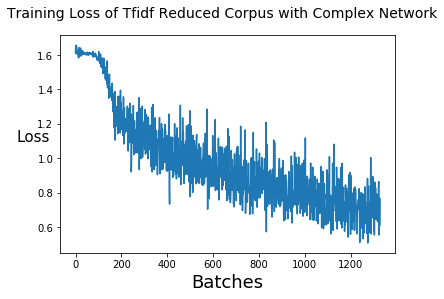

In [260]:
fig = plt.figure()

fig.suptitle('Training Loss of Tfidf Reduced Corpus with Complex Network', fontsize=14)
plt.xlabel('Batches', fontsize=18)
plt.ylabel('Loss', fontsize=15,rotation=0)

plt.plot(losses)

plt.show()

In [ ]:
for x,y in x_train:
    print(x)

In [144]:
arr_full.shape

(7587, 500, 500)

In [148]:
con_arr_full = np.concatenate(arr_full)

In [149]:
con_arr_full.shape

(3793500, 500)